# Proyek Analisis Data: [Air-Quality-Dataset]
- **Nama:** Bagus Satrio Wicaksono
- **Email:** bsatrio121@gmail.com
- **ID Dicoding:** satss121

## Menentukan Pertanyaan Bisnis

- bagaimana perubahan nilai PM10 dari tahun 2015 hingga 2017?
- pada tanggal berapa nilai PM10 tertinggi di China?
- Bagaimana hubungan antara tingkat PM10 dengan temperature?
- Bagaimana persebaran stasiun pengecekan data yang ada di China?

## Import Semua Packages/Library yang Digunakan

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
import numpy as np
from geopy.geocoders import Nominatim # type: ignore # type: ignore;

## Data Wrangling

### Gathering Data

#### masukkan data frame ke file

In [67]:
data_dir = './data/'

# membaca data csv
df_Aotizhongxin     = pd.read_csv(data_dir + 'PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_Changping        = pd.read_csv(data_dir + 'PRSA_Data_Changping_20130301-20170228.csv')
df_Dingling         = pd.read_csv(data_dir + 'PRSA_Data_Dingling_20130301-20170228.csv')
df_Dongsi           = pd.read_csv(data_dir + 'PRSA_Data_Dongsi_20130301-20170228.csv')
df_Guanyuan         = pd.read_csv(data_dir + 'PRSA_Data_Guanyuan_20130301-20170228.csv')
df_Gucheng          = pd.read_csv(data_dir + 'PRSA_Data_Gucheng_20130301-20170228.csv')
df_Huairou          = pd.read_csv(data_dir + 'PRSA_Data_Huairou_20130301-20170228.csv')
df_Nongzhanguan     = pd.read_csv(data_dir + 'PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_Shunyi           = pd.read_csv(data_dir + 'PRSA_Data_Shunyi_20130301-20170228.csv')
df_Tiantan          = pd.read_csv(data_dir + 'PRSA_Data_Tiantan_20130301-20170228.csv')
df_Wanliu           = pd.read_csv(data_dir + 'PRSA_Data_Wanliu_20130301-20170228.csv')
df_Wanshouxigong    = pd.read_csv(data_dir + 'PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# membuat dictionary untuk data tiap kota agar mudah dipanggil
data_city = {'Aotizhongxin': df_Aotizhongxin,
            'Changping': df_Changping,
            'Dingling': df_Dingling,
            'Dongsi': df_Dongsi,
            'Guanyuan': df_Guanyuan,
            'Gucheng': df_Gucheng,
            'Huairou': df_Huairou,
            'Nongzhanguan': df_Nongzhanguan,
            'Shunyi': df_Shunyi,
            'Tiantan': df_Tiantan,
            'Wanliu': df_Wanliu,
            'Wanshouxigong': df_Wanshouxigong}

#### mengecek setiap informasi di seluruh kota di cina

In [68]:
data_city['Aotizhongxin'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- data frame kota Aotizhongxin memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [69]:
data_city['Changping'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- data frame kota Changping memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [70]:
data_city['Dingling'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**Insight:**
- data frame kota Dingling memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [71]:
data_city['Dongsi'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- data frame kota Dongsi memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [72]:
data_city['Guanyuan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- data frame kota Guanyuan memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [73]:
data_city['Gucheng'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


**Insight:**
- data frame kota Gucheng memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [74]:
data_city['Huairou'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


**Insight:**
- data frame kota Huairou memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [75]:
data_city['Nongzhanguan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
- data frame kota Nongzhanguan memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [76]:
data_city['Shunyi'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- data frame kota Shunyi memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [77]:
data_city['Tiantan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- data frame kota Tiantan memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [78]:
data_city['Wanliu'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


**Insight:**
- data frame kota Wanliu memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [79]:
data_city['Wanshouxigong'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- data frame kota Wanshouxigong memiliki 18 kolom yaitu number, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

In [80]:
# List untuk menyimpan DataFrame yang sudah ditambahkan kolom city
df_list = []

# Looping melalui dictionary untuk menambahkan kolom city dan menyatukan data
for city, df in data_city.items():
    df_list.append(df)  # Menyimpan DataFrame yang telah dimodifikasi

# Menggabungkan semua DataFrame menjadi satu
df_combined = pd.concat(df_list, ignore_index=True)

# Menampilkan informasi dataset baru
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None


In [81]:
# Menampilkan beberapa baris pertama
df_combined.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


**Insight:**
- kita akan menangani data kualitas udara dari 12 kota dari negara China, kota yang dimaksud adalah : Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong
- data frame setiap kota memiliki 18 kolom yang memiliki karakteristik yang sama satu sama lain, kolom pada dataframe tersebut adalah : No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station
- kolom station meunjukkan informasi dimana parameter tersebut didapatkan

### Assessing Data

#### mengecek informasi dari setiap dataset

In [82]:
for df_name, df in data_city.items():
    print(f"Tipe data untuk dataset: {df_name}")
    print(df.dtypes)
    print("\n" + "-"*50 + "\n")

Tipe data untuk dataset: Aotizhongxin
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

--------------------------------------------------

Tipe data untuk dataset: Changping
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

--------------------------------------------------

Tipe data untuk dataset: Dingling
No           int64
year         int64
month        int64
day          int64

program diatas digunakan untuk mengetahui tipe data pada featur di dataframe

##### Cek duplikasi data

In [83]:
# membuat variable untuk mengetahui duplikasi data
duplicate_counts = {}
total_sample_counts = {}

# kalkulasi jumlah data duplikasi dan total data
for df_name, df in data_city.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)

# membuat dataframe yang berisi jumlah data duplikasi dan total data
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# menggabungkan kedua dataframe
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
Aotizhongxin,35064,0
Changping,35064,0
Dingling,35064,0
Dongsi,35064,0
Guanyuan,35064,0
Gucheng,35064,0
Huairou,35064,0
Nongzhanguan,35064,0
Shunyi,35064,0
Tiantan,35064,0


program diatas digunakan untuk mengetahui apakah ada duplikasi pada data, dari informasi tersebut kita mengetahui tidak ada duplikasi pada featur disetiap dataframe

##### Cek Data Hilang

In [84]:
for df_name, df in data_city.items():
  print('\n', data_city[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entri

program diatas digunakna untuk mengetahui data yang berisi dan data yang tidak berisi/ null pada feature di data frame. dari hasil analisis tersebut didapatkan bahwa terdapat feature yang memiliki niliai null

In [85]:
# Membuat dictionary untuk menyimpan jumlah nilai kosong per kolom
null_counts = {}

# Loop untuk menghitung nilai kosong per kolom dan total sampel per dataset
for df_name, df in data_city.items():
    # Menghitung jumlah NaN per kolom
    null_counts[df_name] = df.isna().sum()  

# Membuat DataFrame dari dictionary jumlah NaN per kolom
null_counts_df = pd.DataFrame.from_dict(null_counts, orient='index')

# Menampilkan hasil
print(null_counts_df)

               No  year  month  day  hour  PM2.5  PM10   SO2   NO2    CO  \
Aotizhongxin    0     0      0    0     0    925   718   935  1023  1776   
Changping       0     0      0    0     0    774   582   628   667  1521   
Dingling        0     0      0    0     0    779   656   730  1234  2012   
Dongsi          0     0      0    0     0    750   553   663  1601  3197   
Guanyuan        0     0      0    0     0    616   429   474   659  1753   
Gucheng         0     0      0    0     0    646   381   507   668  1401   
Huairou         0     0      0    0     0    953   777   980  1639  1422   
Nongzhanguan    0     0      0    0     0    628   440   446   692  1206   
Shunyi          0     0      0    0     0    913   548  1296  1365  2178   
Tiantan         0     0      0    0     0    677   597  1118   744  1126   
Wanliu          0     0      0    0     0    382   284   575  1070  1812   
Wanshouxigong   0     0      0    0     0    696   484   669   754  1297   

           

program diatas digunakan untuk mengetahui lebih detail letak data kosong terdapat di mana saja. Hasilnya adalah, data kosong hampir mencangkup semua featur pada data frame

#### Menambahkan kolom date untuk menunjukkan waktu

In [86]:
for df_name, df in data_city.items():
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

#### mengecek informasi dari setiap dataset

In [87]:
for df_name, df in data_city.items():
  print('\n', data_city[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34139 non-null  float64       
 6   PM10     34346 non-null  float64       
 7   SO2      34129 non-null  float64       
 8   NO2      34041 non-null  float64       
 9   CO       33288 non-null  float64       
 10  O3       33345 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34983 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

#### Mengidentifikasi Outlier

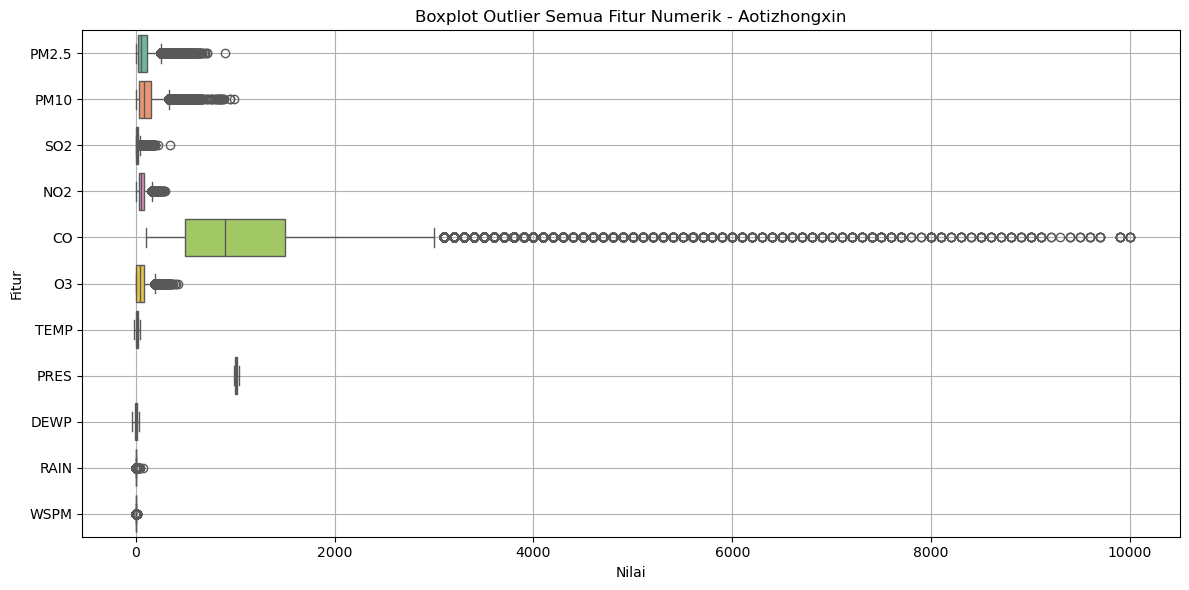

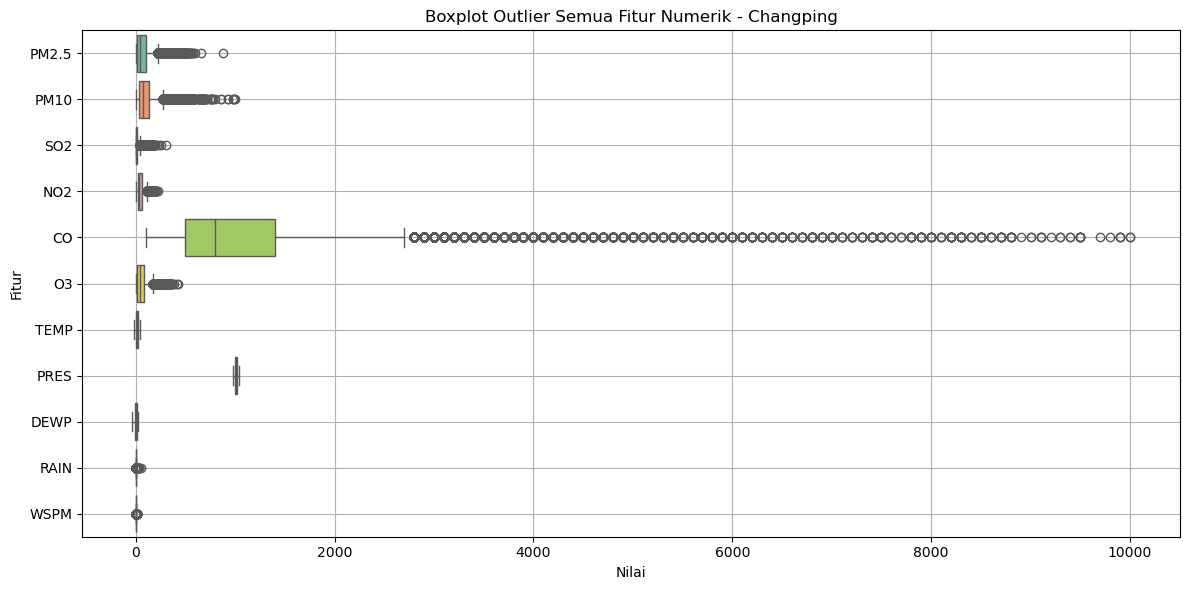

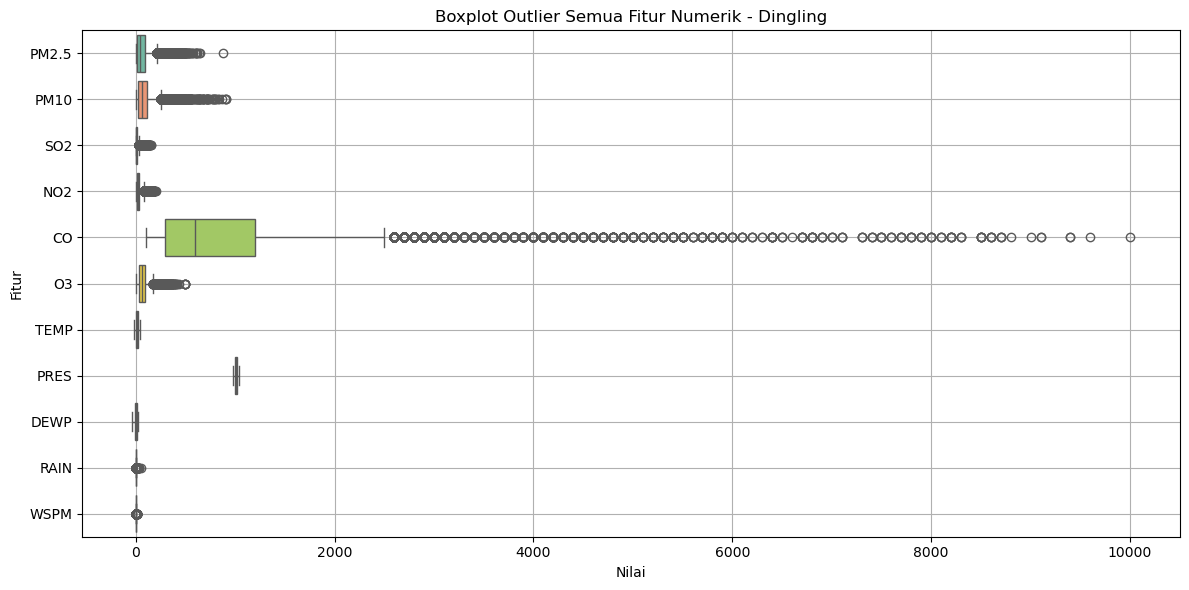

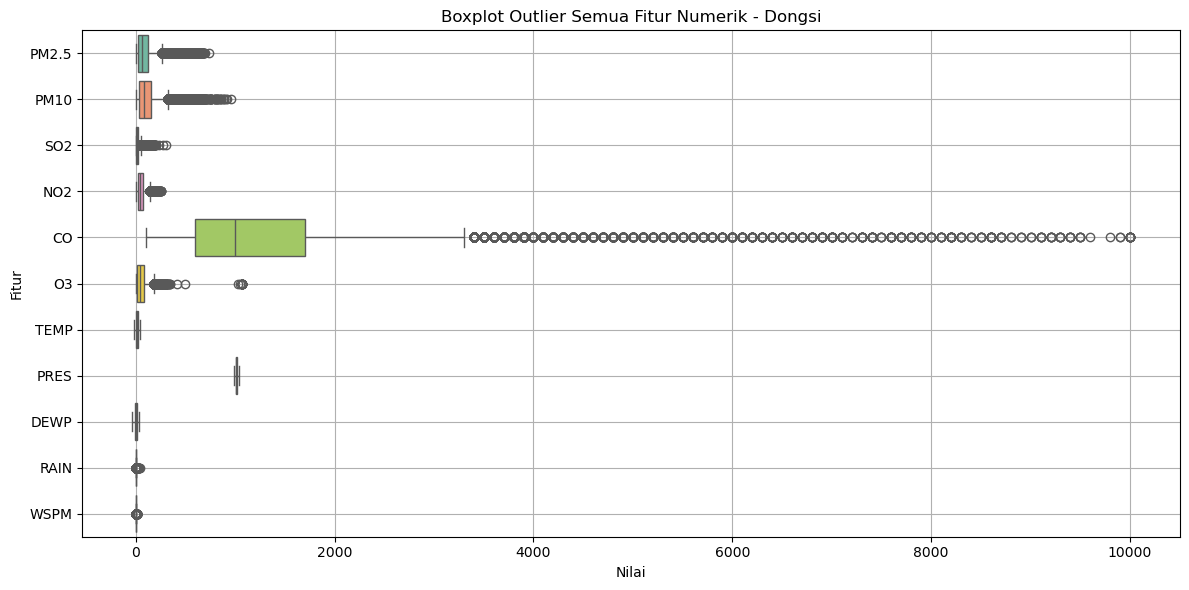

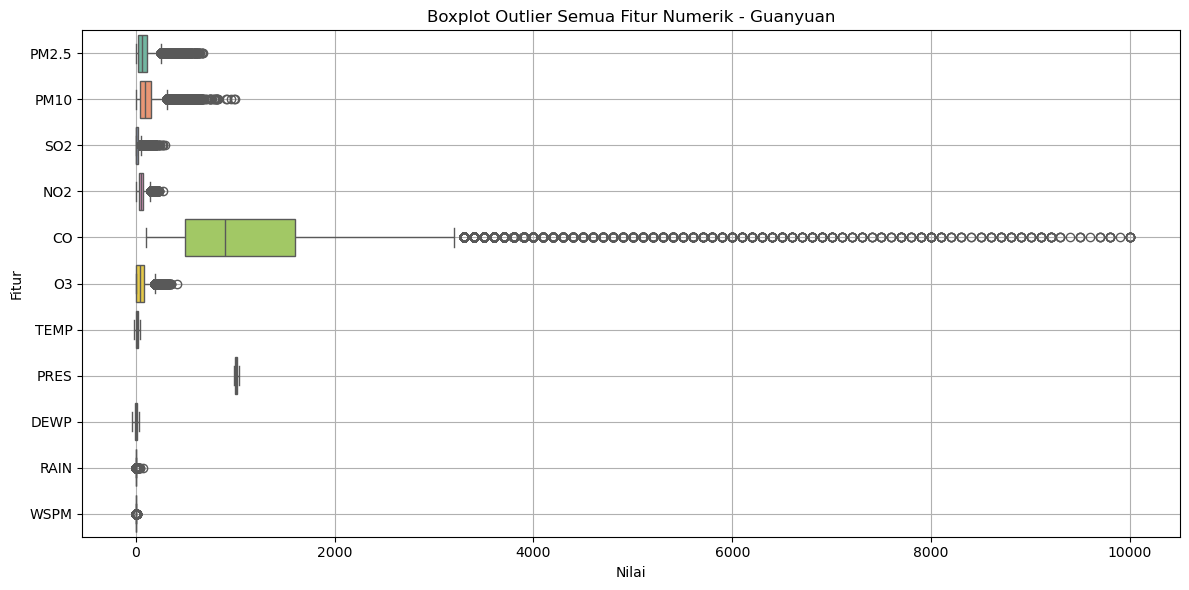

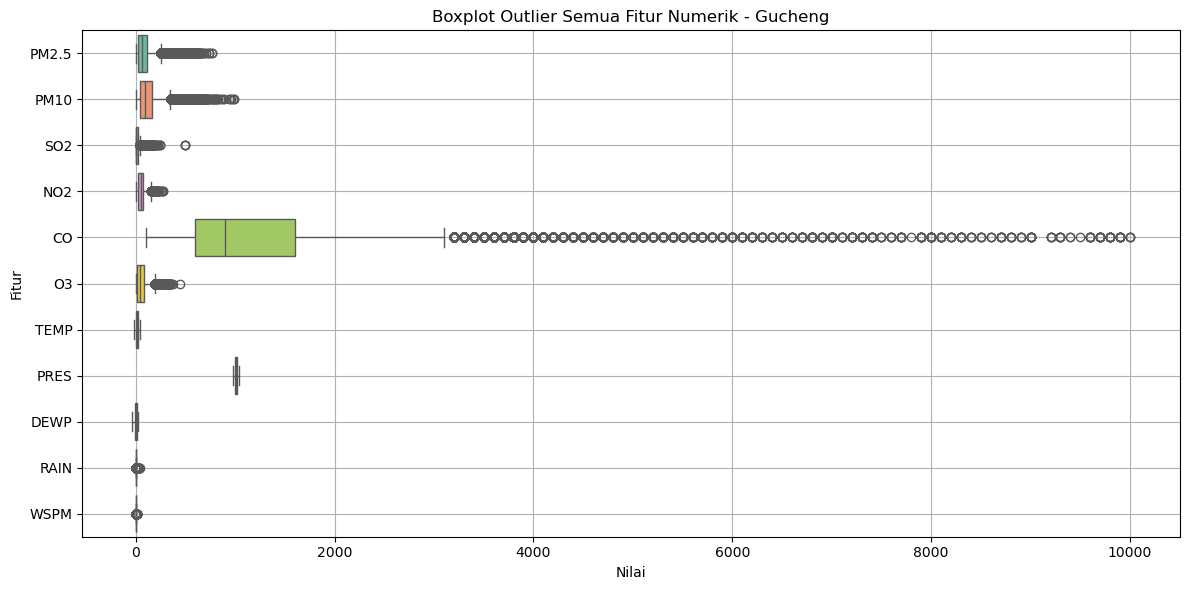

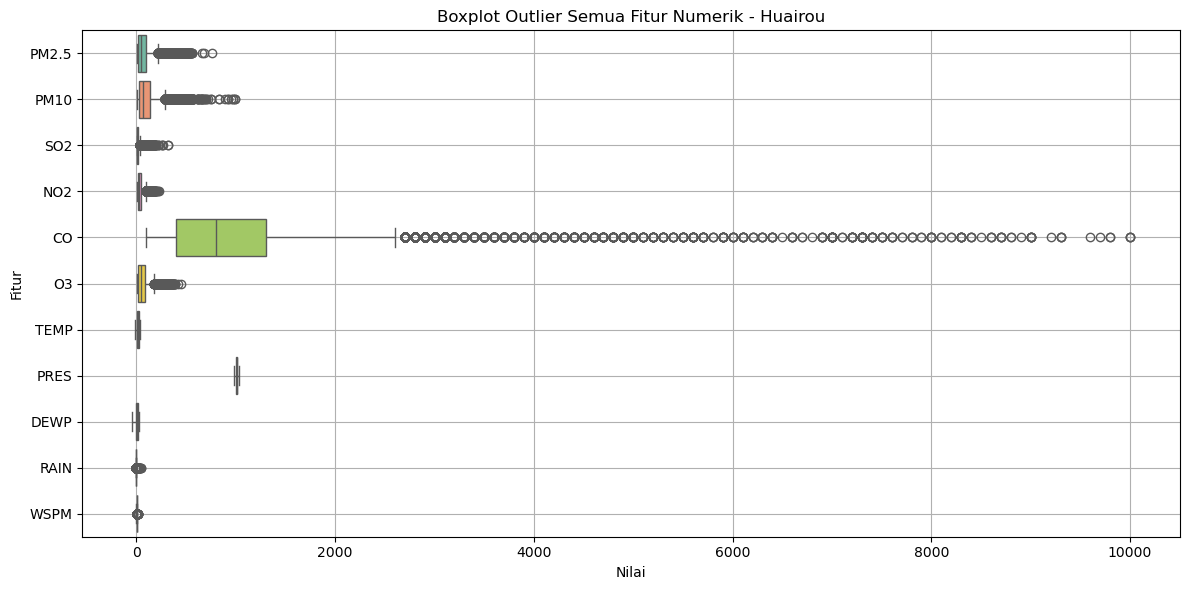

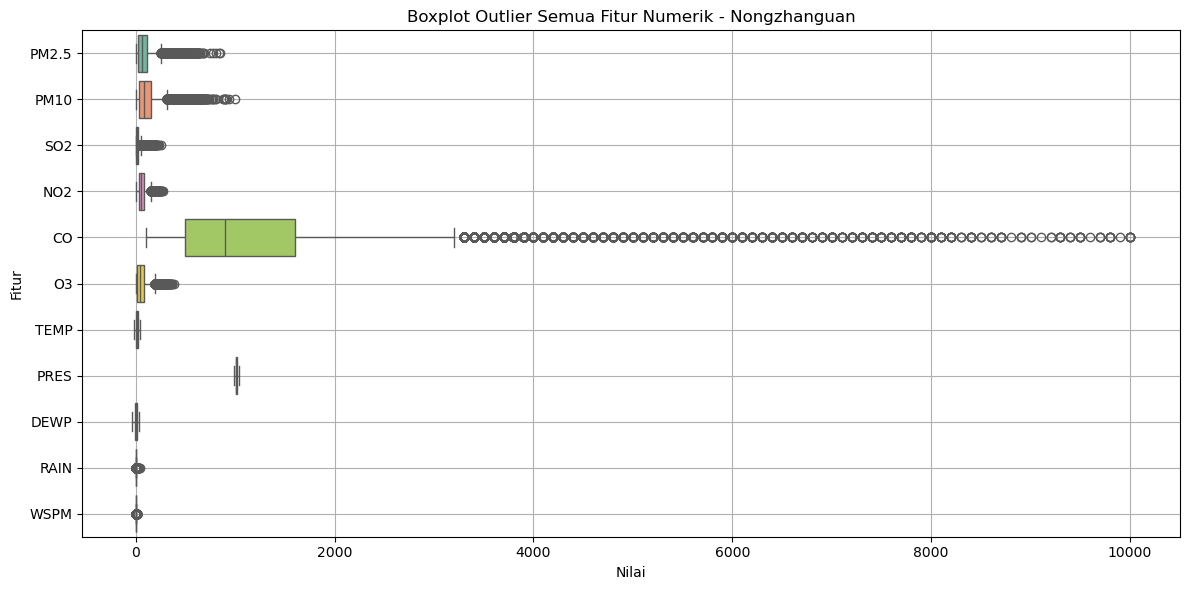

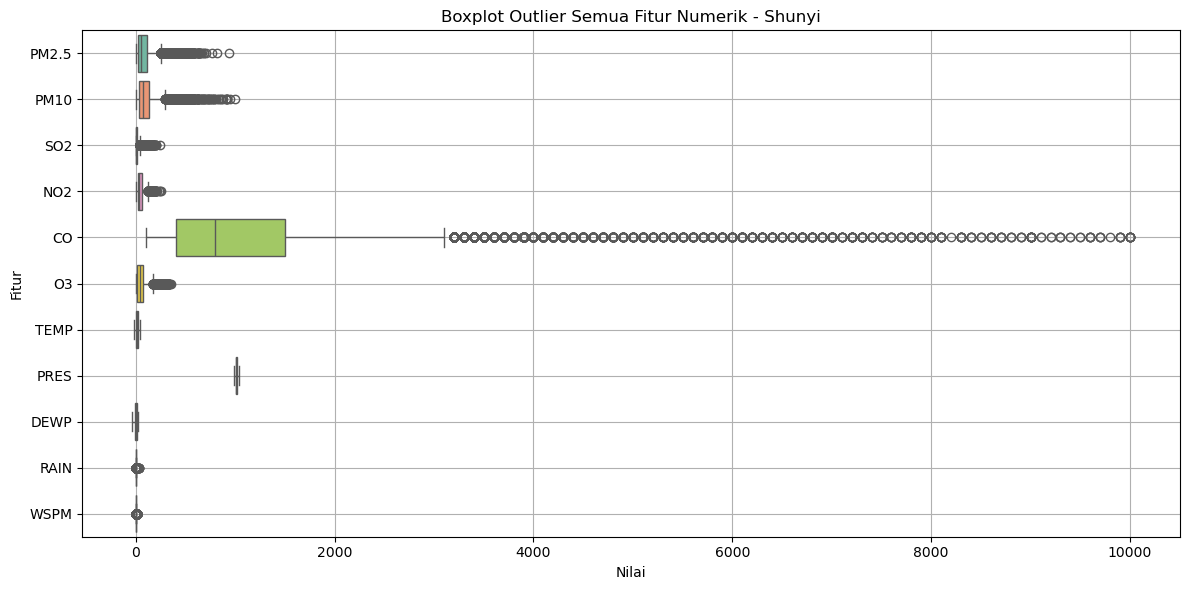

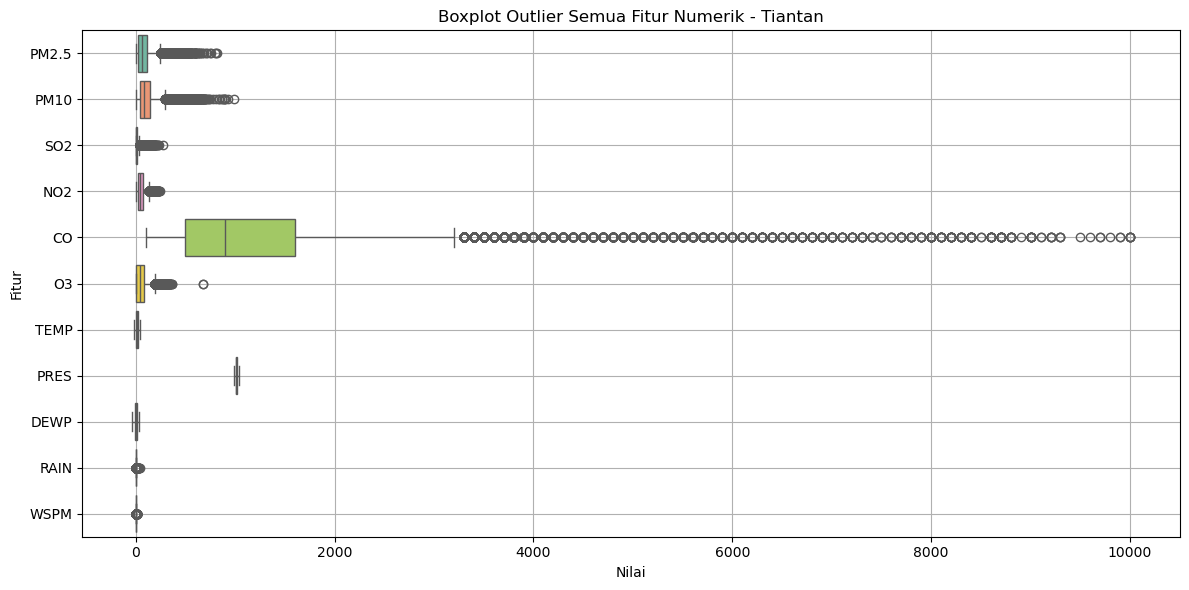

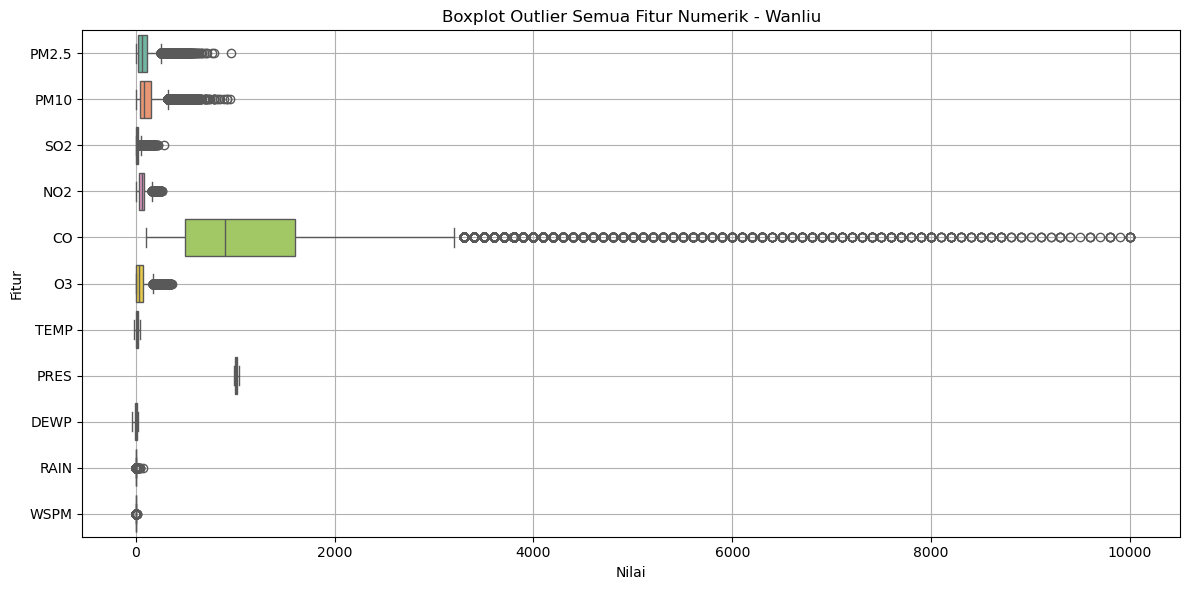

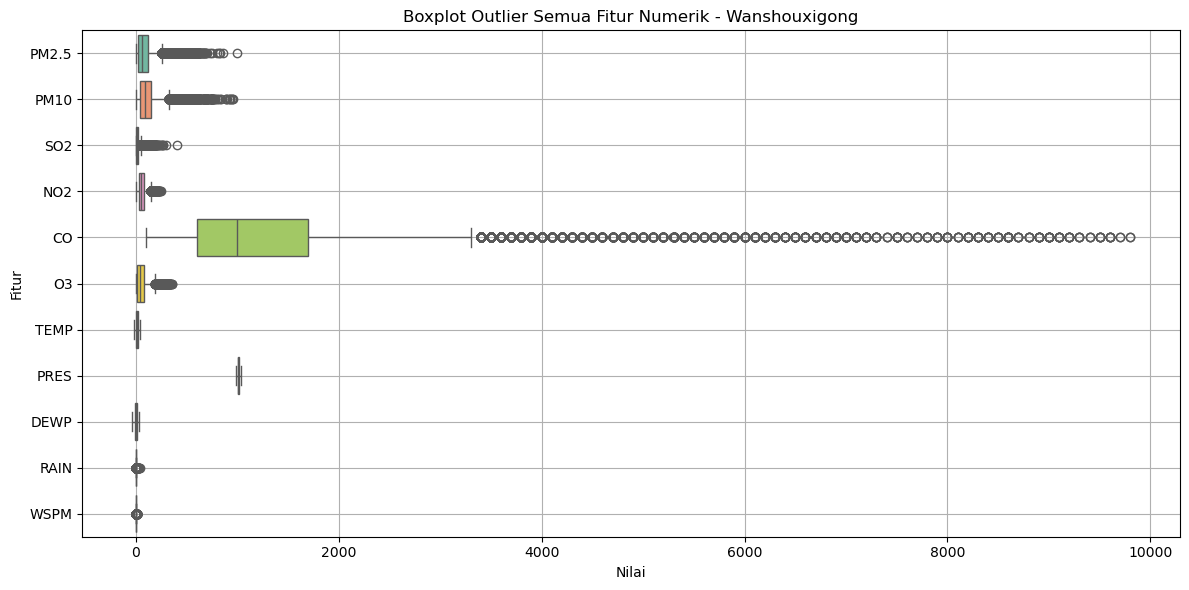

In [88]:
for df_name, df in data_city.items():
    # drop kolom yang tidak diperlukan
    data_city[df_name].drop(columns=['year', 'month', 'day', 'hour','No'], inplace=True)

    # ambil data dari dictionary
    df = data_city[df_name]

    # Pilih hanya kolom numerik
    df_numerik = df.select_dtypes(include='number')

    # Ukuran figure tergantung jumlah kolom
    plt.figure(figsize=(12, 6))

    # Buat boxplot seaborn
    sn.boxplot(data=df_numerik, orient='h', palette='Set2')

    plt.title('Boxplot Outlier Semua Fitur Numerik - ' + df_name)
    plt.xlabel('Nilai')
    plt.ylabel('Fitur')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

program diatas menunjukkan informasi mengenai outlier pada setiap feature number (kecuali No) pada semua dataframe, hasil menunjukkan bahwa hampir semua feature mengalami outlier maka dari itu lebih baik kita hapus saja feature yang tidak perlu.

#### Menghapus feature yang tidak perlu

In [89]:
for df_name, df in data_city.items():
    # drop kolom yang tidak diperlukan
    data_city[df_name].drop(columns=['PM2.5','SO2','NO2','CO','O3','PRES','DEWP','RAIN','wd','WSPM'], inplace=True)

**Insight:**
- Tidak ada duplikasi data
- Terdapat missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WD, WSPM
- Banyak feature yang mengalami outlier, yaitu PM2.5, PM10, SO2, NO2, CO, O3, RAIN, WSPM
- membuat feature baru date yang memiliki informasi tanggal bulan tahun dan jam, dari hasil pembuatan tersebut didapatkan informasi bahwa informasi seperti OC, PM10, dll diambil setiap satu jam sekali
- menghapus feature yang tidak perlu pada data frame

#### mencari tahu salah satu dari data frame pada colom PM10

In [90]:
# mencari tahu seberapa penting data yang hilang
df_new = data_city["Aotizhongxin"]
df_new[df_new.PM10.isna()]

,PM10,TEMP,station,date
204,NaN,12.4,Aotizhongxin,2013-03-09 12:00:00
2949,NaN,24.0,Aotizhongxin,2013-07-01 21:00:00
3133,NaN,23.7,Aotizhongxin,2013-07-09 13:00:00
4513,NaN,17.9,Aotizhongxin,2013-09-05 01:00:00
4706,NaN,18.9,Aotizhongxin,2013-09-13 02:00:00
...,...,...,...,...
34880,NaN,-0.3,Aotizhongxin,2017-02-21 08:00:00
34883,NaN,1.3,Aotizhongxin,2017-02-21 11:00:00
34885,NaN,-2.1,Aotizhongxin,2017-02-21 13:00:00
35028,NaN,12.1,Aotizhongxin,2017-02-27 12:00:00


### Cleaning Data

#### Mengisi data kosong numeric dengan nilai rata-rata

In [91]:
# Mengisi nilai pada kolom numerik yang hilang dengan rata-rata
null_counts = {}

for df_name, df in data_city.items():
    # Ambil hanya kolom numerik
    numeric_cols = df.select_dtypes(include='number').columns
    
    # Interpolasi hanya pada kolom numerik
    df[numeric_cols] = df[numeric_cols].ffill()
    
    # Simpan kembali
    data_city[df_name] = df

# Loop untuk menghitung nilai kosong per kolom dan total sampel per dataset
for df_name, df in data_city.items():
    # Menghitung jumlah NaN per kolom
    null_counts[df_name] = df.isna().sum()  

# Membuat DataFrame dari dictionary jumlah NaN per kolom
null_counts_df = pd.DataFrame.from_dict(null_counts, orient='index')

# Menampilkan hasil
print(null_counts_df)

               PM10  TEMP  station  date
Aotizhongxin      0     0        0     0
Changping         0     0        0     0
Dingling          0     0        0     0
Dongsi            0     0        0     0
Guanyuan          0     0        0     0
Gucheng           0     0        0     0
Huairou           0     0        0     0
Nongzhanguan      0     0        0     0
Shunyi            0     0        0     0
Tiantan           0     0        0     0
Wanliu            0     0        0     0
Wanshouxigong     0     0        0     0


program diatas digunakan untuk mengisi data kosong pada feature numeric dengan nilai sebelahnya. saya memilih mengisi sesuai dengan nilai sebelahnya karena dari nilai tersebut dapat merepresentasikan informasi pada keadaan di tanggal dan waktu tersebut

#### Mengecek hasil dari data cleaning

In [92]:
for df_name, df in data_city.items():
  print(df_name,'\n', data_city[df_name].describe(),'\n')

Aotizhongxin 
                PM10          TEMP                 date
count  35064.000000  35064.000000                35064
mean     110.733262     13.581908  2015-03-01 11:30:00
min        2.000000    -16.800000  2013-03-01 00:00:00
25%       38.000000      3.100000  2014-03-01 05:45:00
50%       88.000000     14.500000  2015-03-01 11:30:00
75%      157.000000     23.300000  2016-02-29 17:15:00
max      984.000000     40.500000  2017-02-28 23:00:00
std       95.375762     11.400761                  NaN 

Changping 
                PM10          TEMP                 date
count  35064.000000  35064.000000                35064
mean      94.794938     13.670841  2015-03-01 11:30:00
min        2.000000    -16.600000  2013-03-01 00:00:00
25%       34.000000      3.400000  2014-03-01 05:45:00
50%       72.000000     14.600000  2015-03-01 11:30:00
75%      130.000000     23.300000  2016-02-29 17:15:00
max      999.000000     41.400000  2017-02-28 23:00:00
std       84.003198     11.368584   

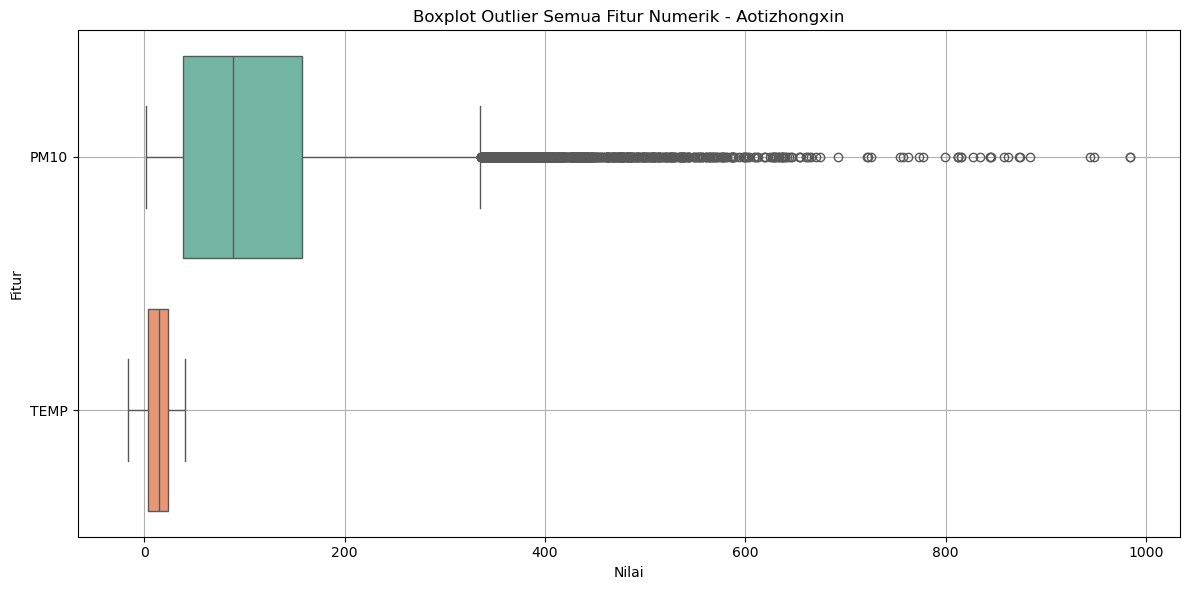

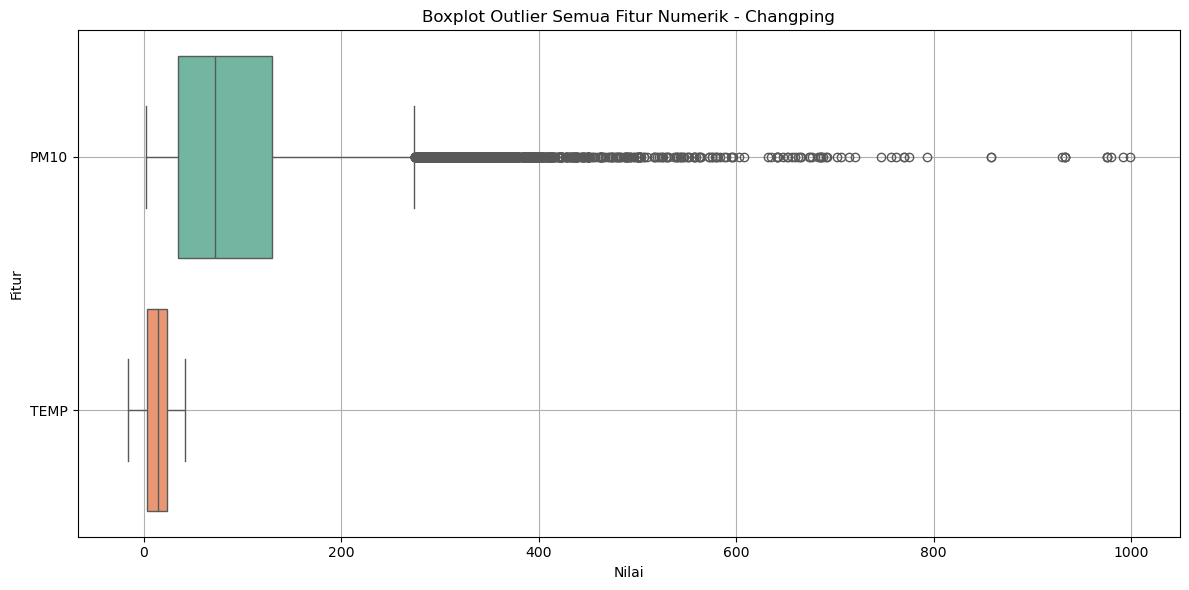

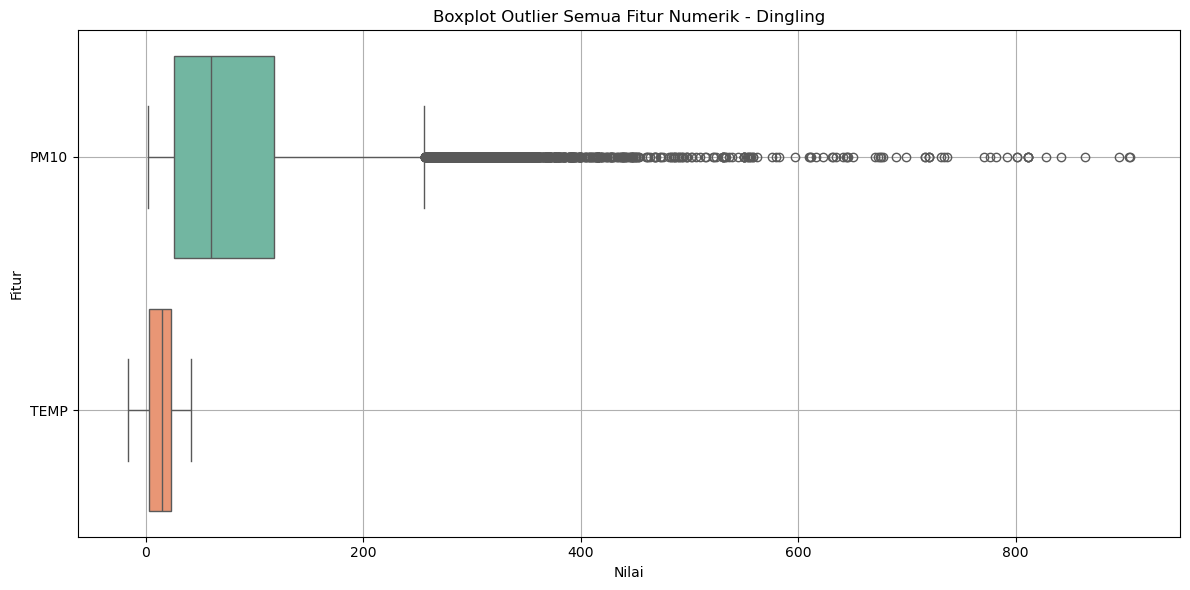

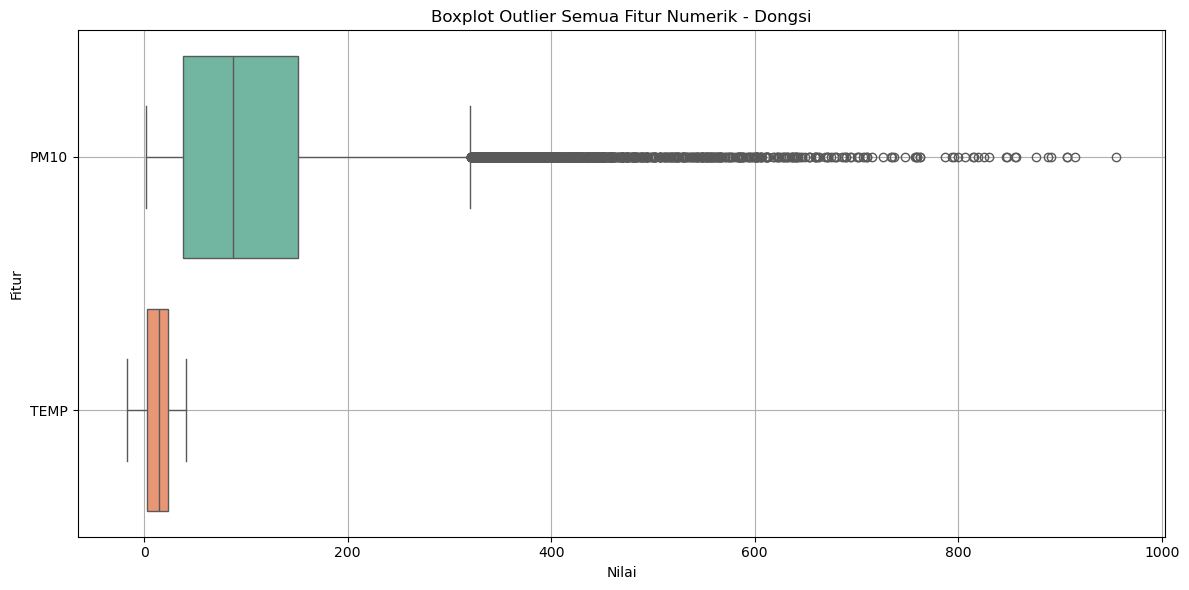

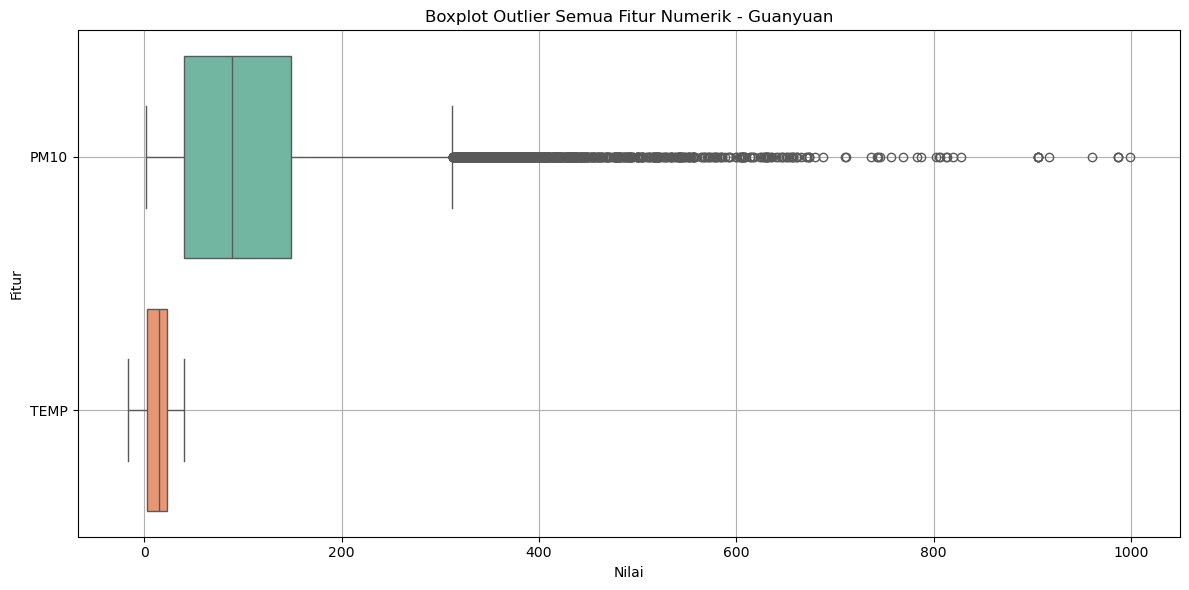

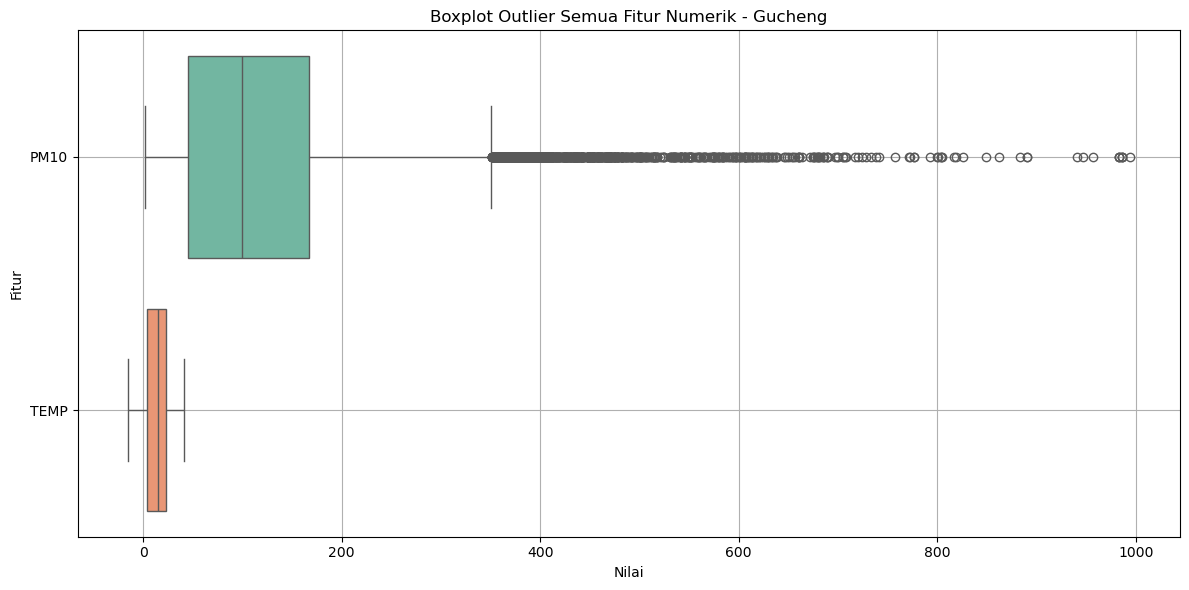

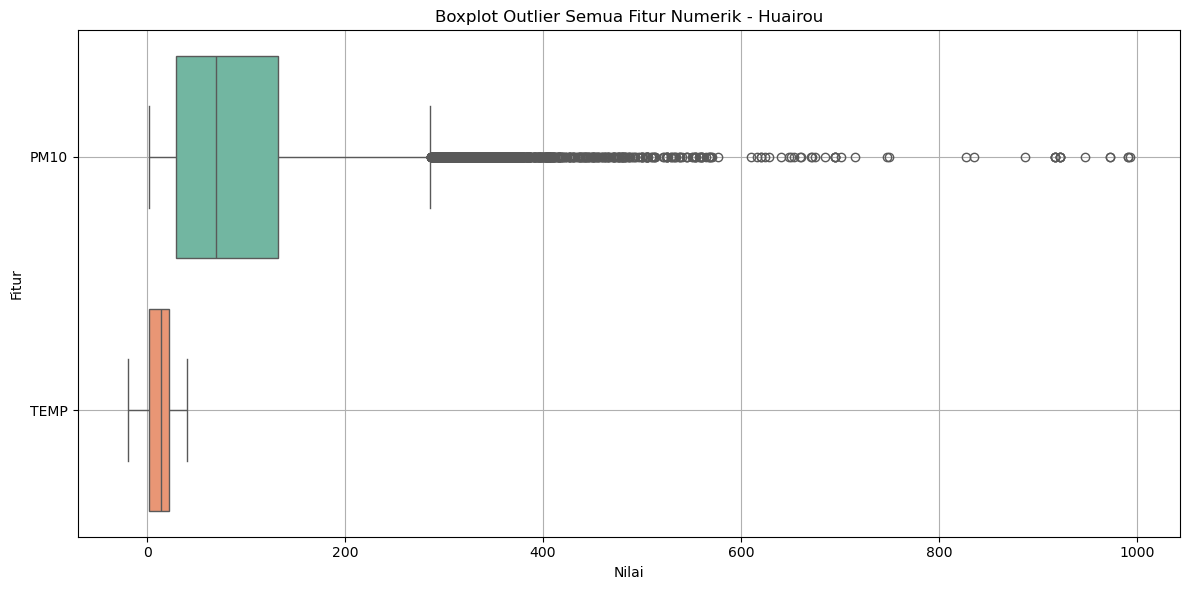

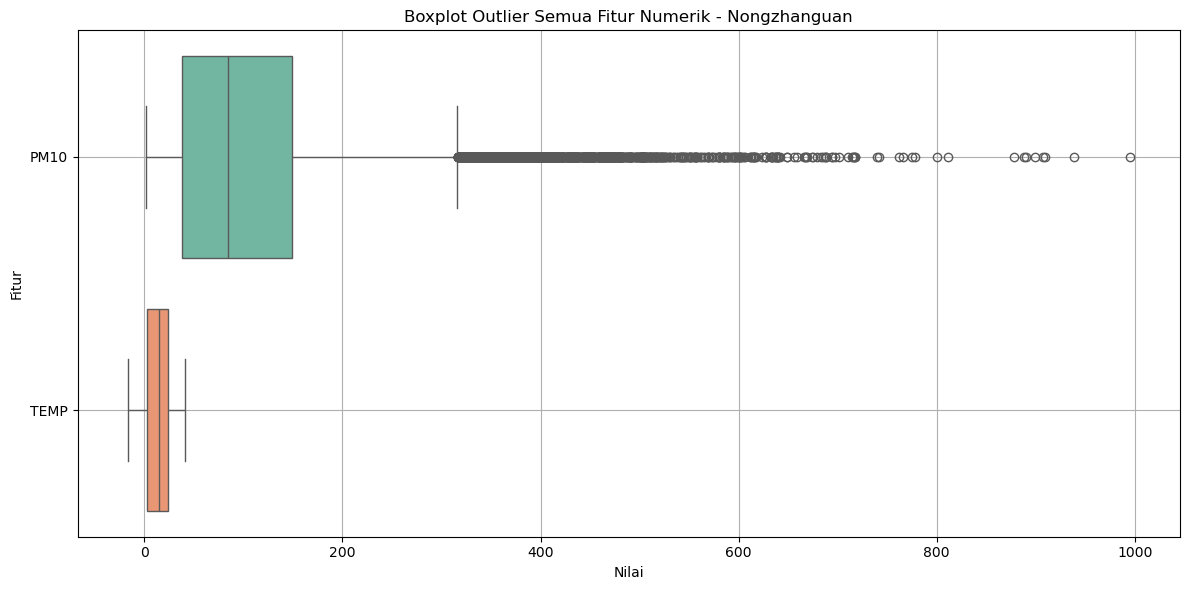

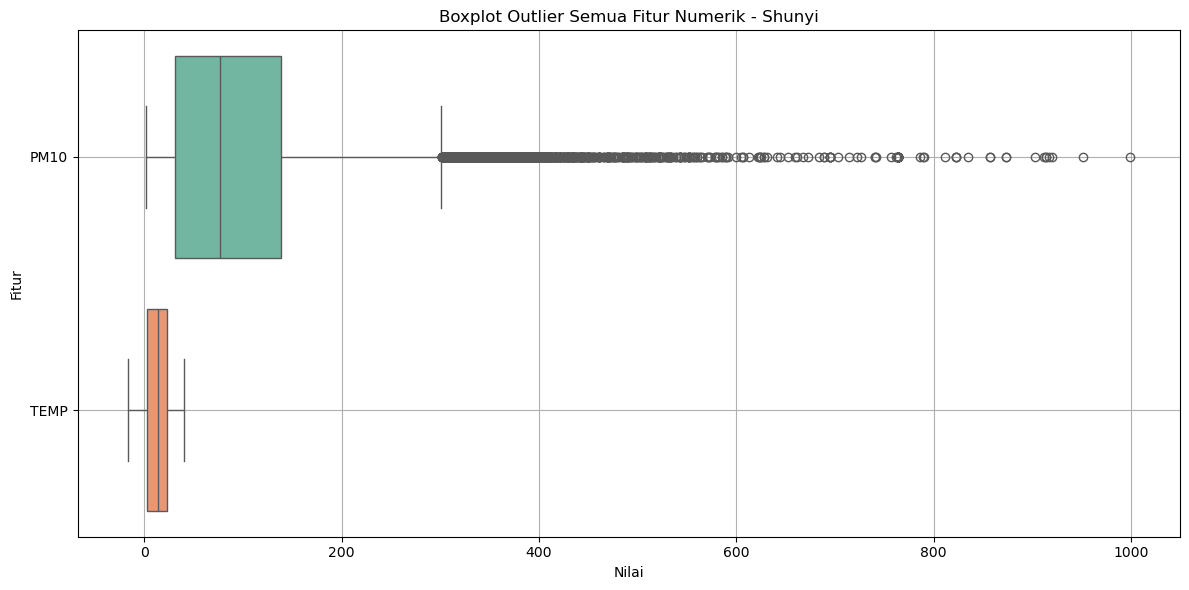

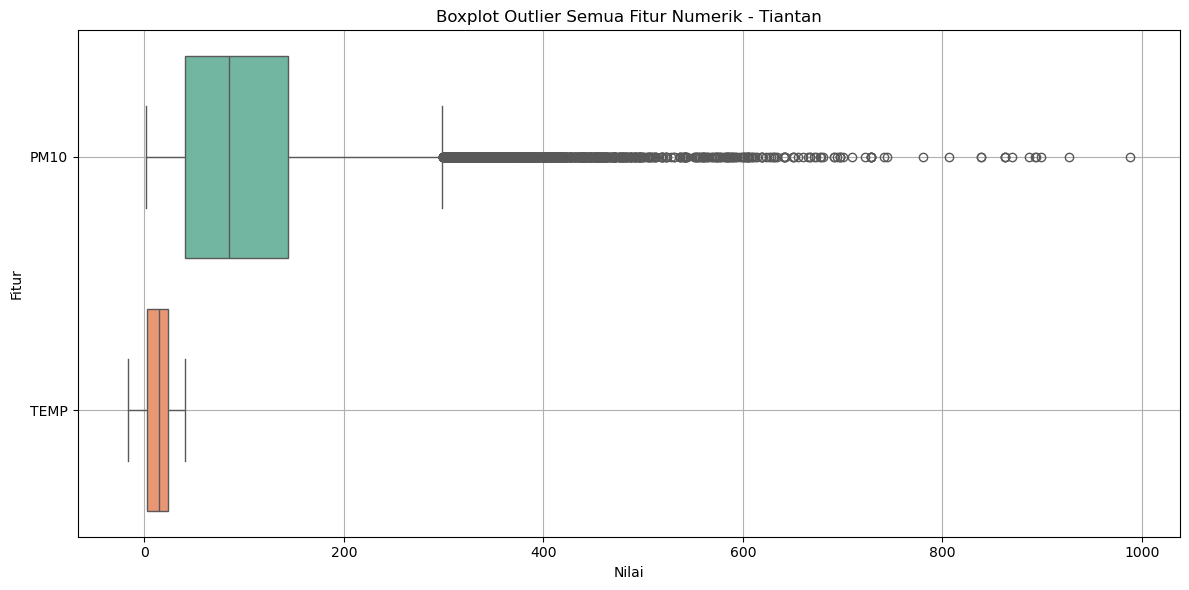

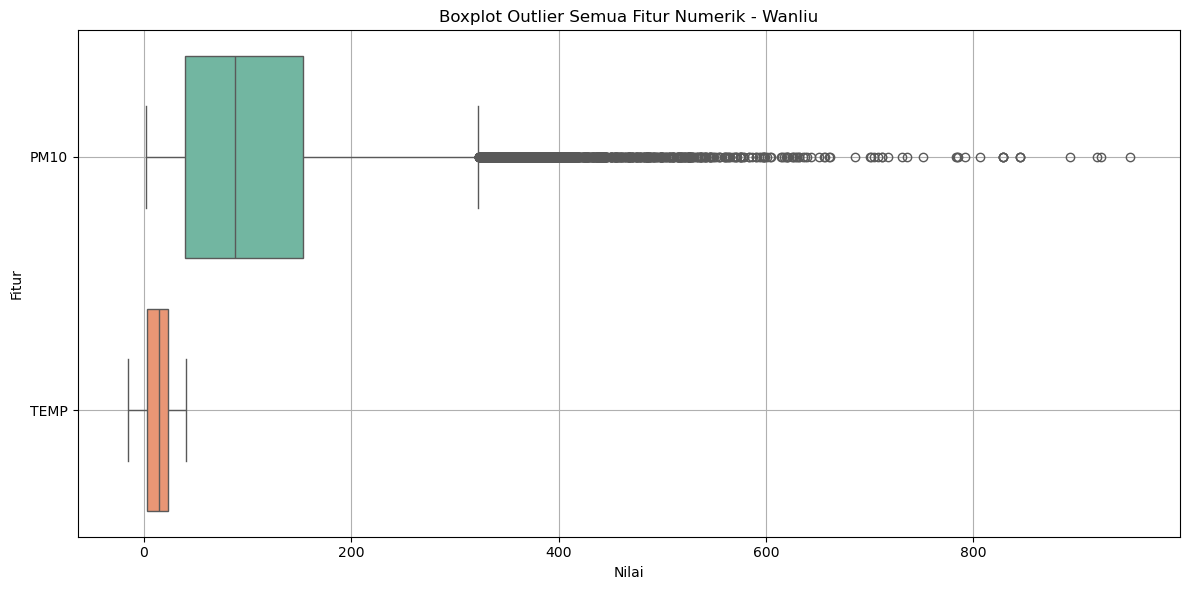

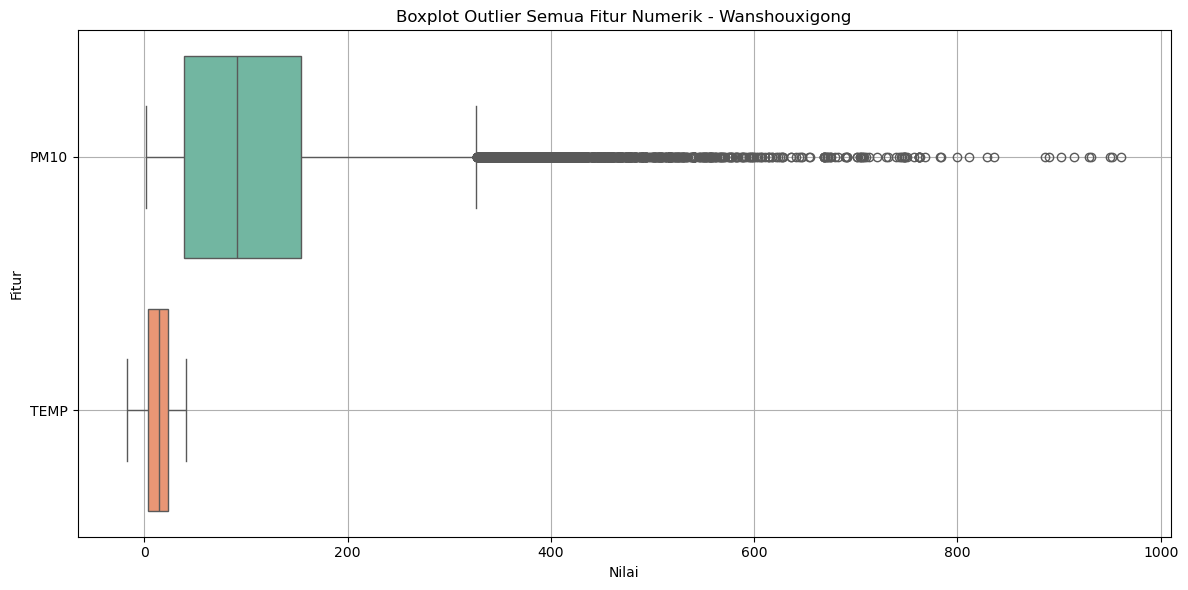

In [93]:
for df_name, df in data_city.items():
    # ambil data dari dictionary
    df = data_city[df_name]

    # Pilih hanya kolom numerik
    df_numerik = df.select_dtypes(include='number')

    # Ukuran figure tergantung jumlah kolom
    plt.figure(figsize=(12, 6))

    # Buat boxplot seaborn
    sn.boxplot(data=df_numerik, orient='h', palette='Set2')

    plt.title('Boxplot Outlier Semua Fitur Numerik - ' + df_name)
    plt.xlabel('Nilai')
    plt.ylabel('Fitur')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Menangani Outlier Pada Program

In [114]:
for df_name, df in data_city.items():
    dataF = data_city[df_name]

    df_numerik = dataF.select_dtypes(include='number')

    for column in df_numerik.columns:
        Q1 = (df_numerik[column]).quantile(0.25)
        Q3 = (df_numerik[column]).quantile(0.75)
        IQR = Q3 - Q1
        
        maximum = Q3 + (1.5*IQR)
        minimum = Q1 - (1.5*IQR)
        
        kondisi_lower_than = df_numerik[column] < minimum
        kondisi_more_than = df_numerik[column] > maximum
        
        data_city[df_name].drop(df_numerik[kondisi_lower_than].index, inplace=True)
        data_city[df_name].drop(df_numerik[kondisi_more_than].index, inplace=True)

In [115]:
data_city['Aotizhongxin'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 33766 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PM10     33766 non-null  float64       
 1   TEMP     33766 non-null  float64       
 2   station  33766 non-null  object        
 3   date     33766 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.3+ MB


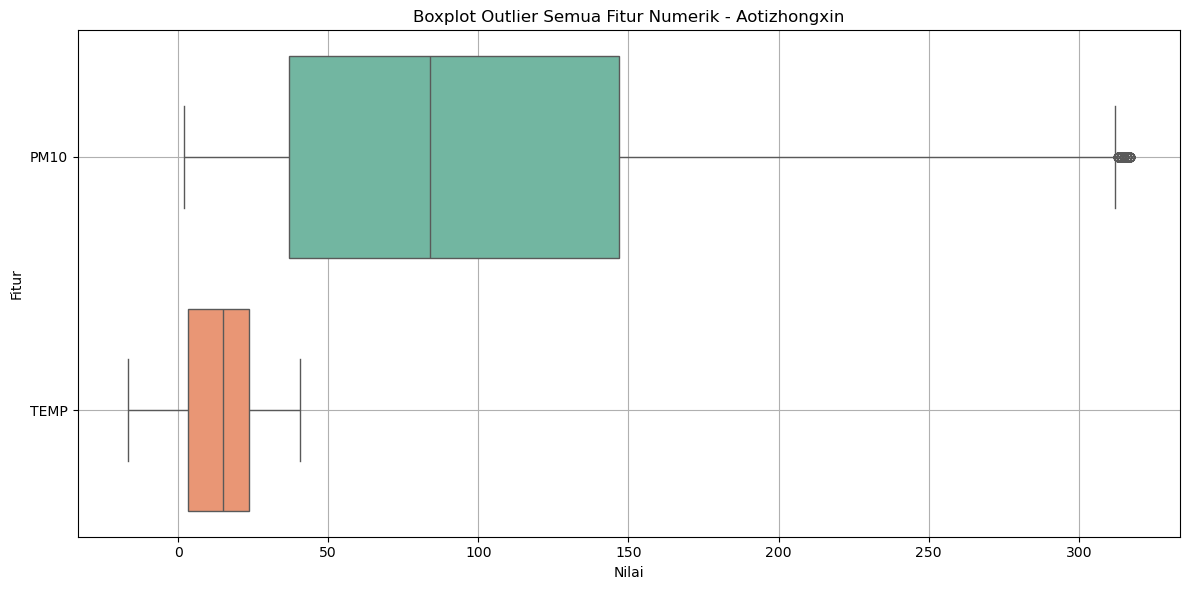

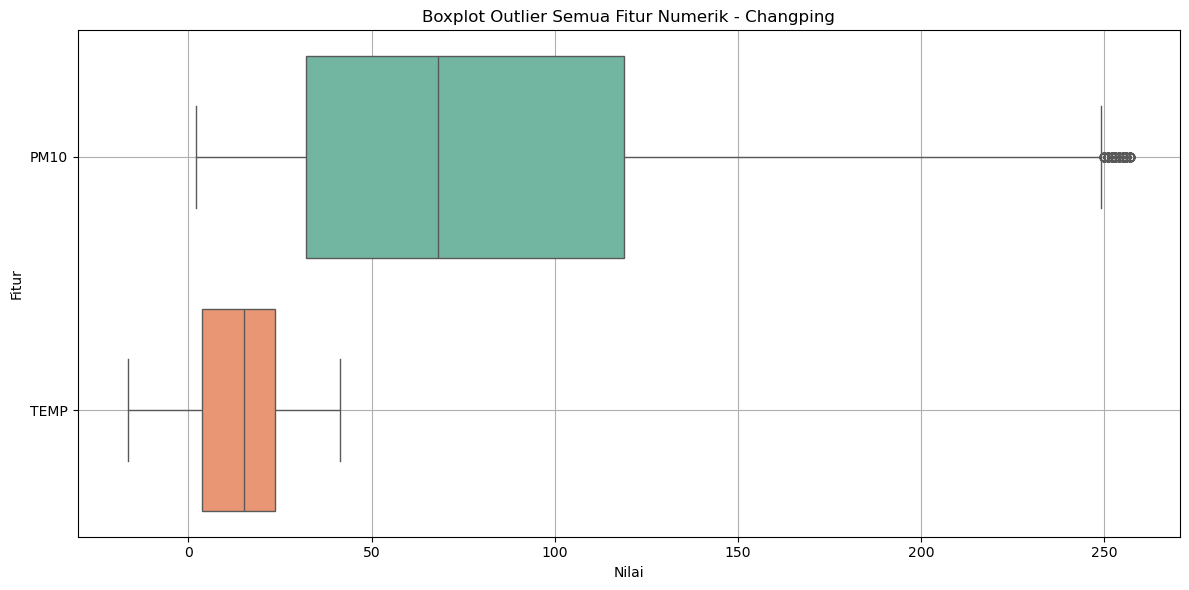

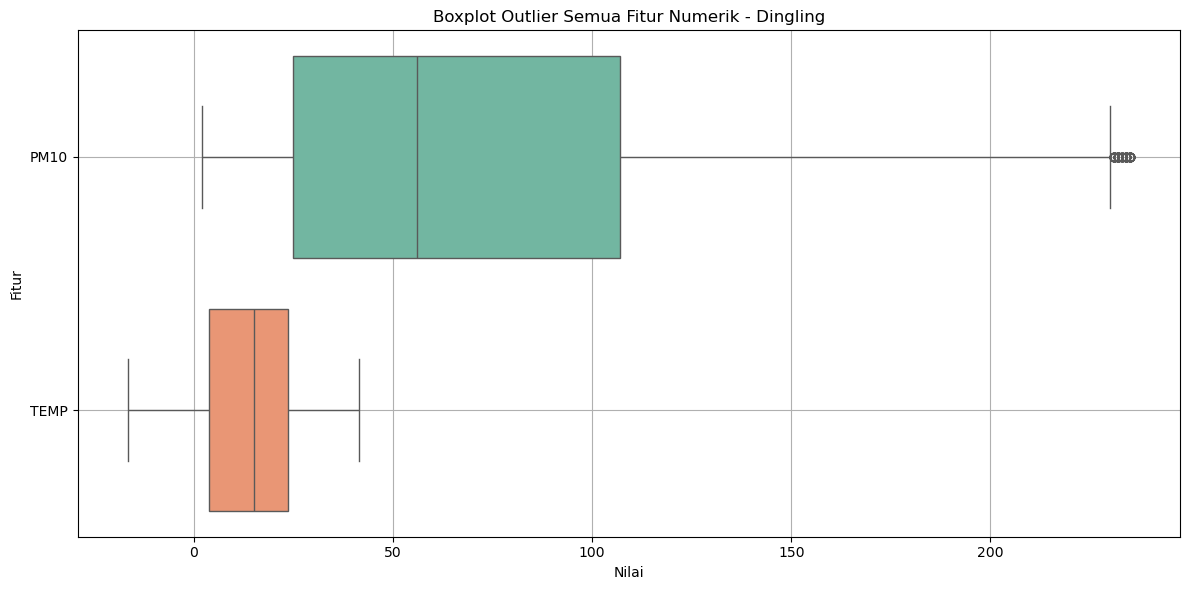

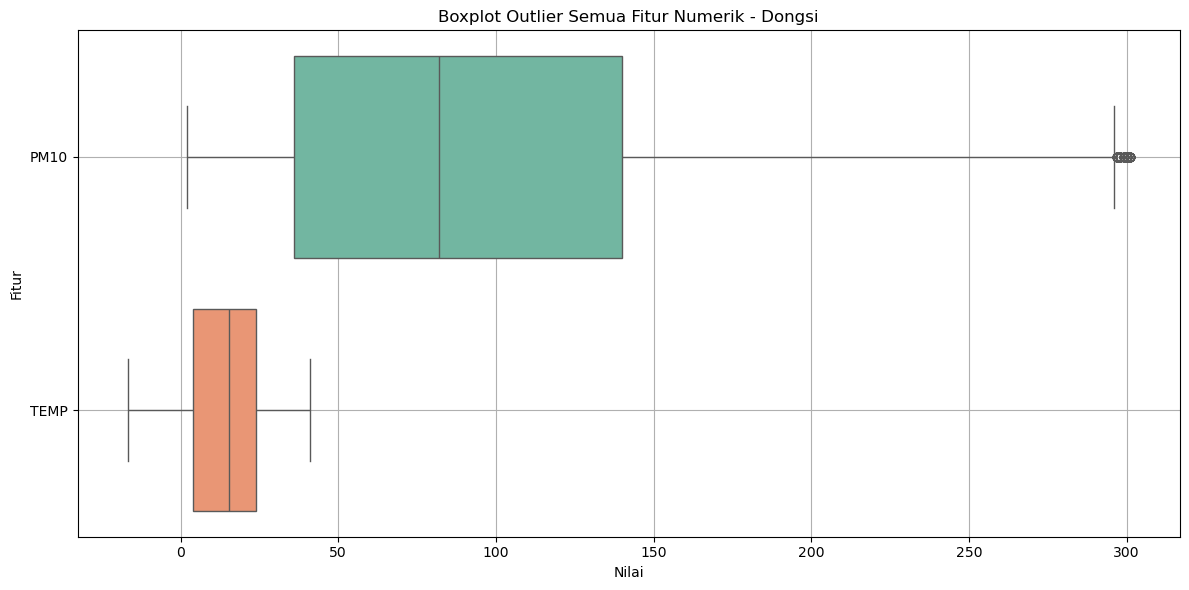

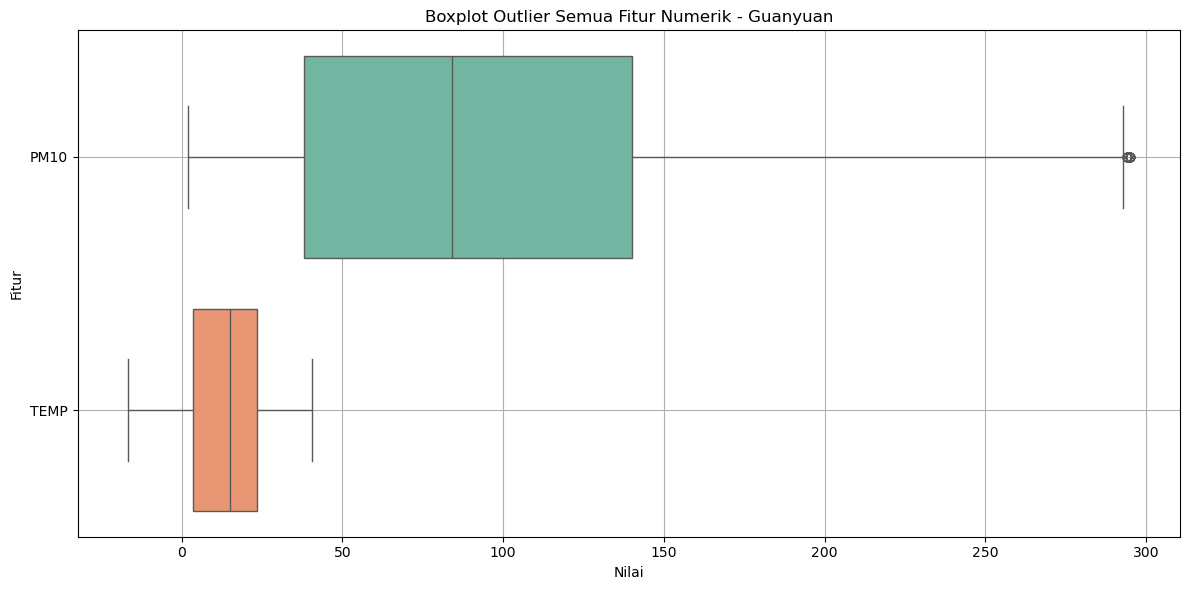

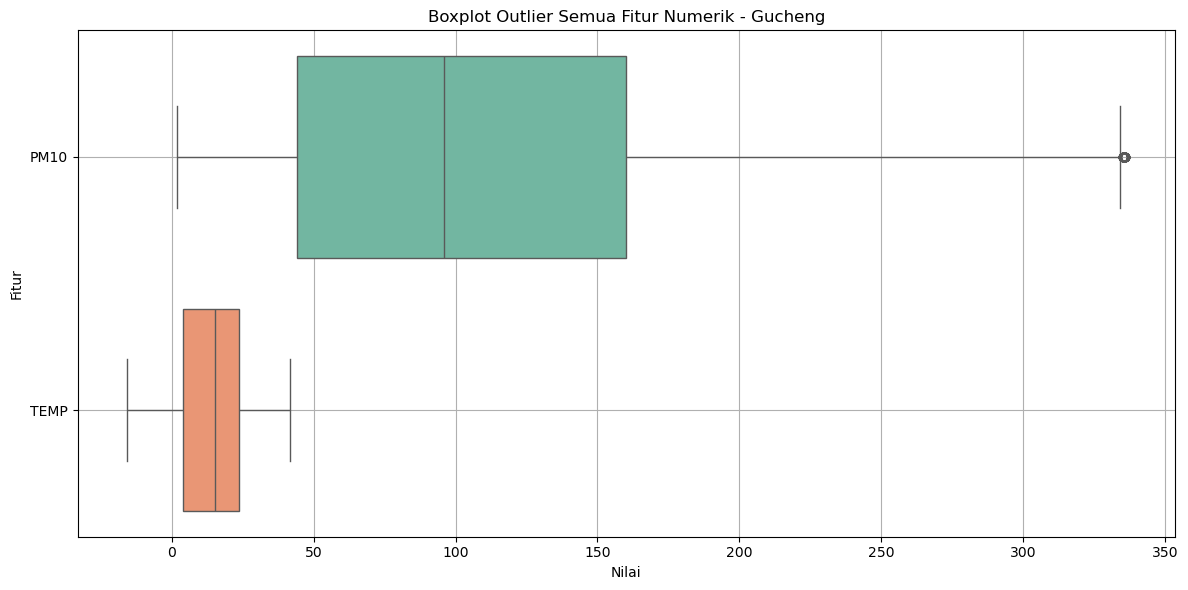

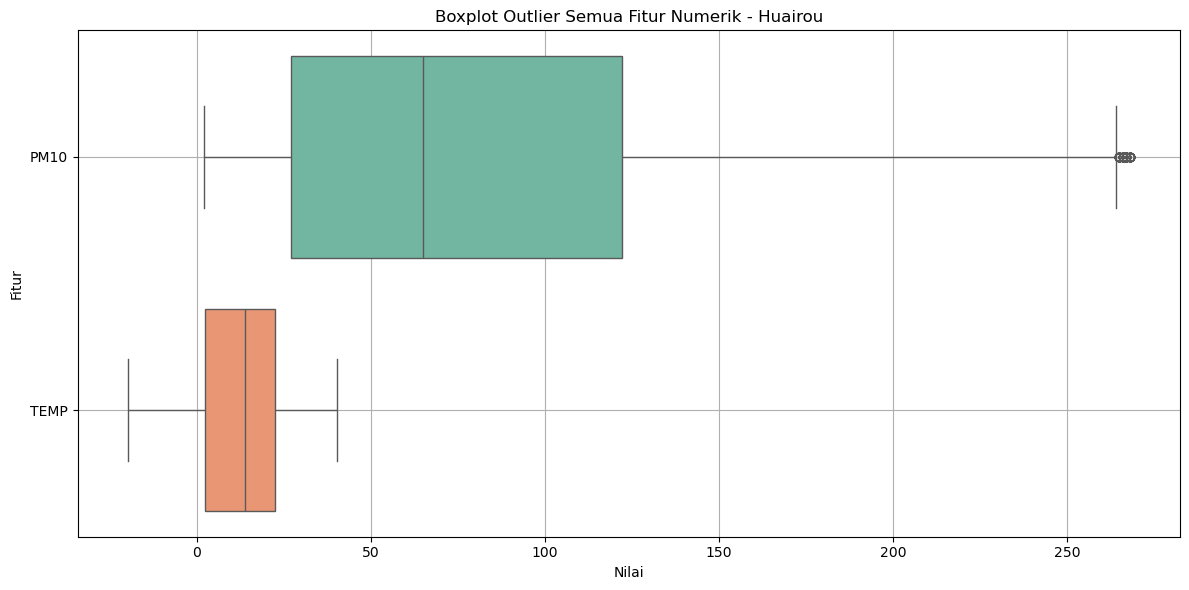

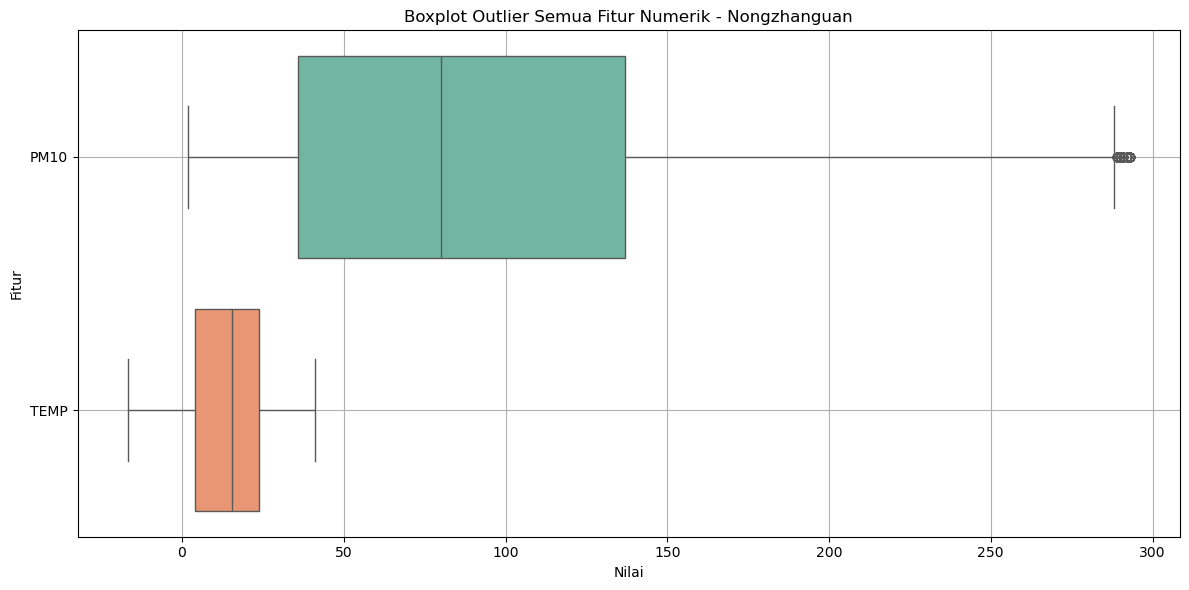

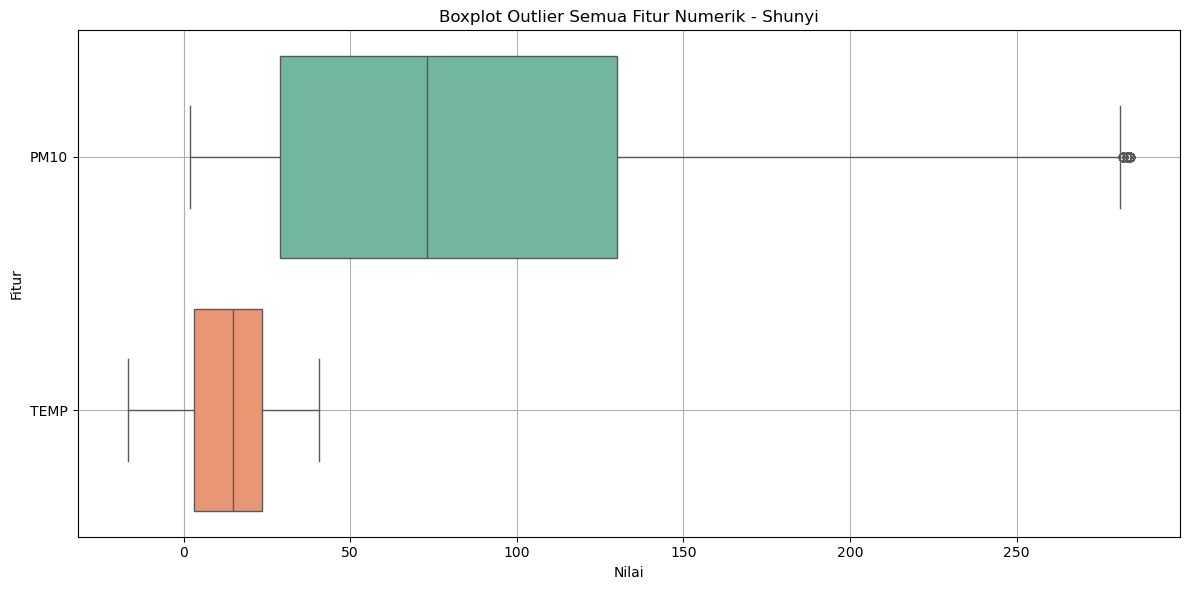

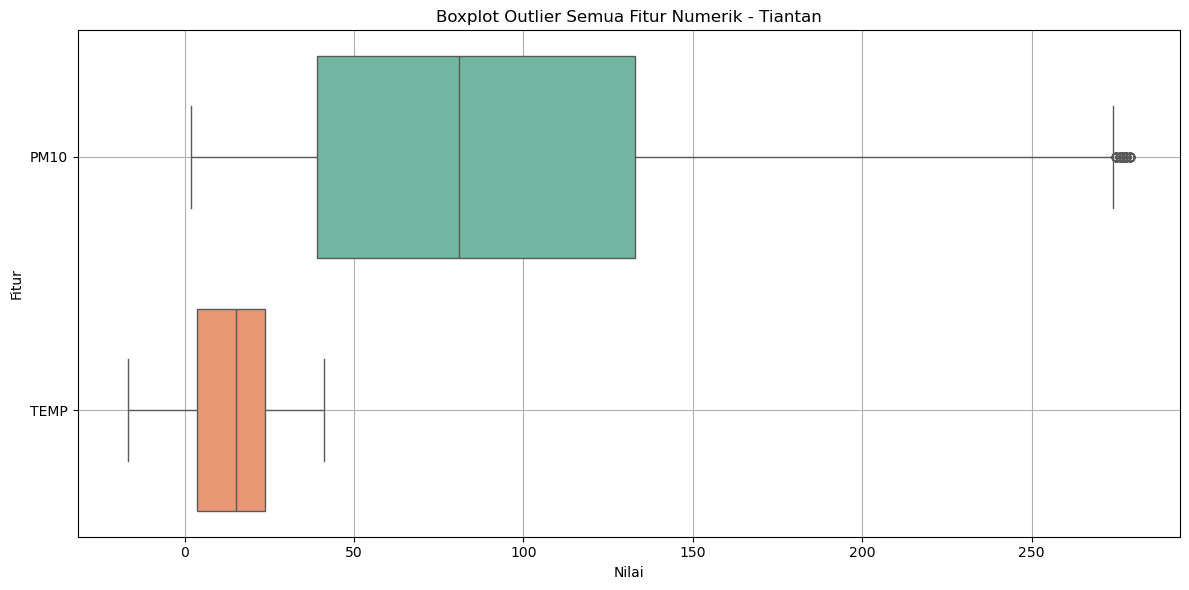

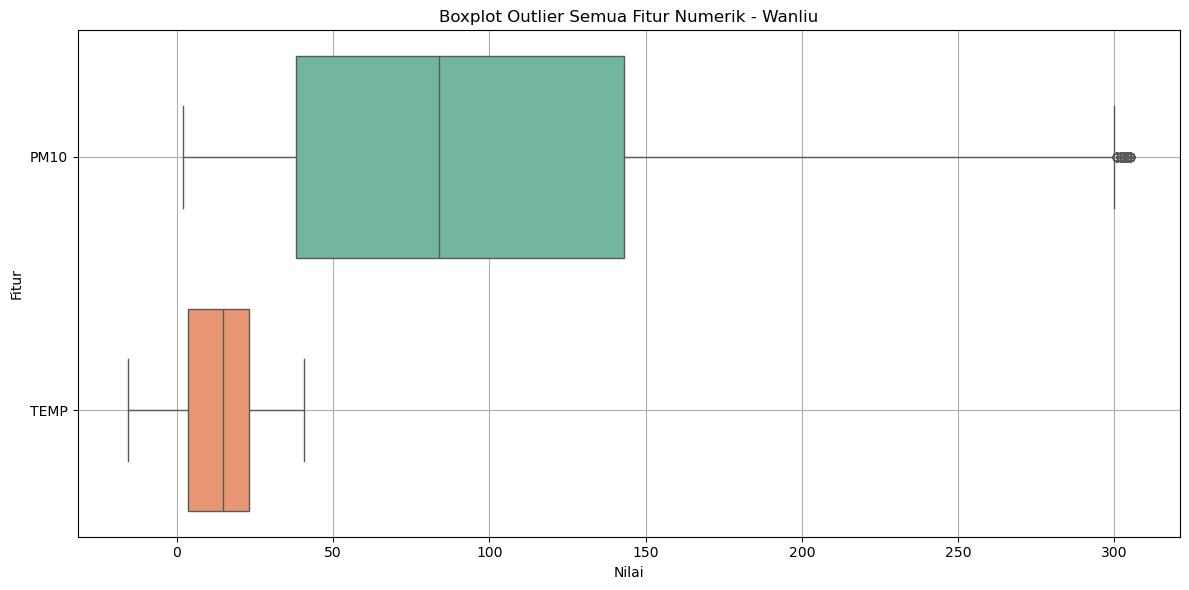

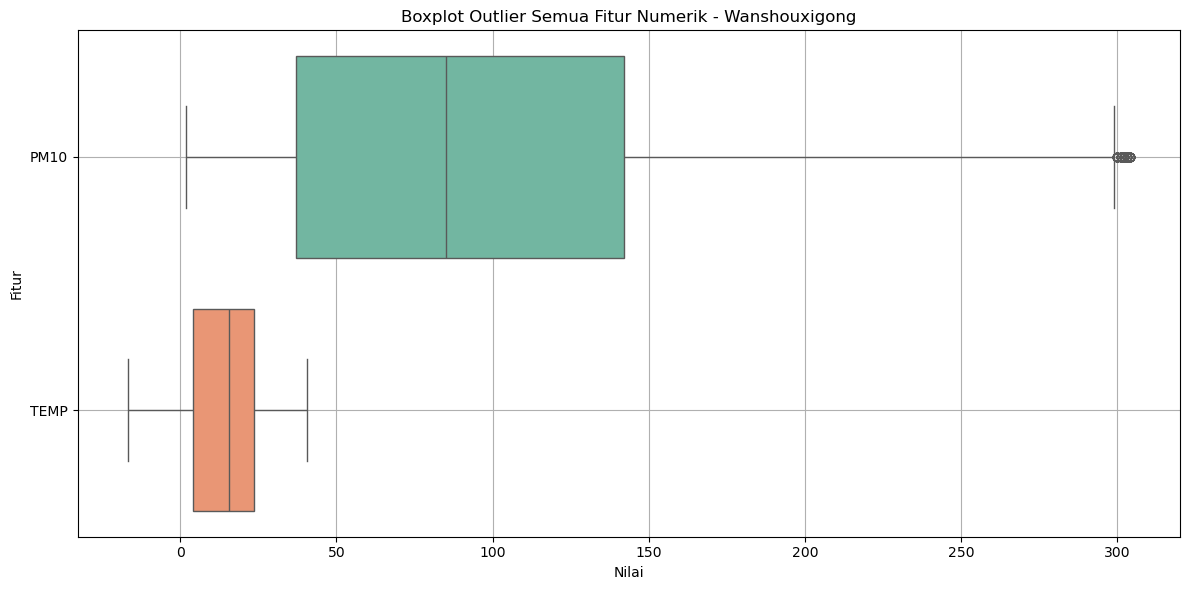

In [116]:
for df_name, df in data_city.items():
    # ambil data dari dictionary
    df = data_city[df_name]

    # Pilih hanya kolom numerik
    df_numerik = df.select_dtypes(include='number')

    # Ukuran figure tergantung jumlah kolom
    plt.figure(figsize=(12, 6))

    # Buat boxplot seaborn
    sn.boxplot(data=df_numerik, orient='h', palette='Set2')

    plt.title('Boxplot Outlier Semua Fitur Numerik - ' + df_name)
    plt.xlabel('Nilai')
    plt.ylabel('Fitur')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Insight:**
- Data kosong bertipe numerik dapat diisi dengan nilai setelahnya karena nilai tersebut dapat merepresentasikan keadaan saat itu
- nilai PM10 mengalami outlier, untuk menangani masalah tersebut kita menggunakan drop

## Exploratory Data Analysis (EDA)

#### Rata-rata nilai PM10 per bulan pada setiap kota pada tahun 2015 hingga 2017

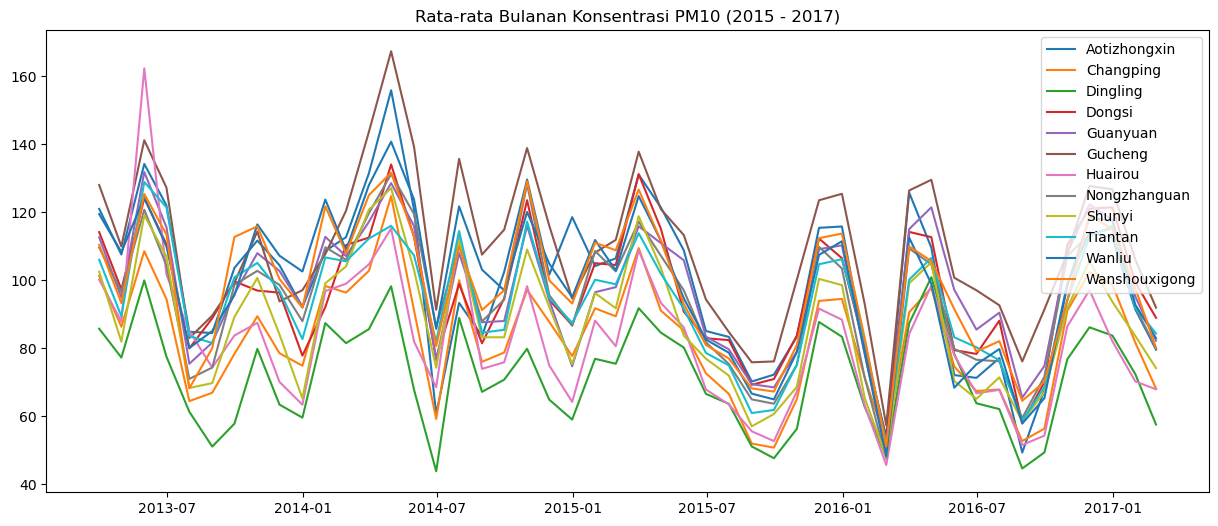

In [ ]:
date_data = {}
data_time_series = {}

for df_name, df in data_city.items():
    date_data[df_name] = df['date']
    # Ubah menjadi indeks waktu dan resample bulanan
    data_time_series[df_name] = df[['date', 'PM10']].set_index('date').resample('ME').mean()

plt.figure(figsize=(15, 6))
for df_name, df in data_time_series.items():
    plt.plot(df.index, df['PM10'], label=df_name)

plt.title('Rata-rata Bulanan Konsentrasi PM10 (2015 - 2017)')
plt.legend()
plt.show()


#### Rata-rata nilai suhu per bulan pada setiap kota pada tahun 2015 hingga 2017

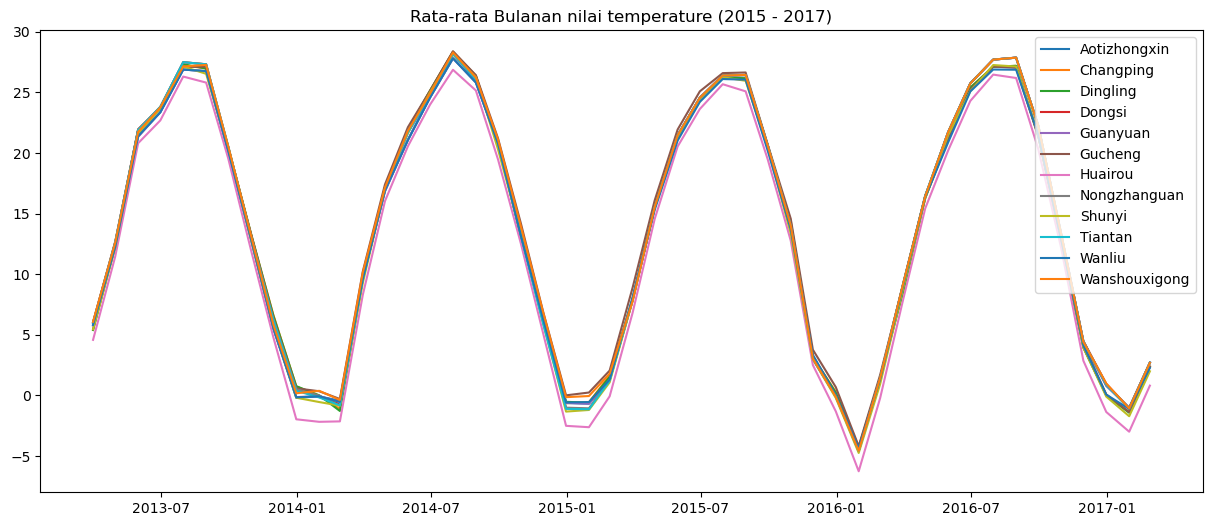

In [ ]:
date_data = {}
data_time_series = {}

for df_name, df in data_city.items():
    date_data[df_name] = df['date']
    # Ubah menjadi indeks waktu dan resample bulanan
    data_time_series[df_name] = df[['date', 'TEMP']].set_index('date').resample('ME').mean()

plt.figure(figsize=(15, 6))
for df_name, df in data_time_series.items():
    plt.plot(df.index, df['TEMP'], label=df_name)

plt.title('Rata-rata Bulanan nilai temperature (2015 - 2017)')
plt.legend()
plt.show()


#### Rata-rata nilai suhu dan PM10 pada setiap kota per bulan pada tahun 2015 - 2017

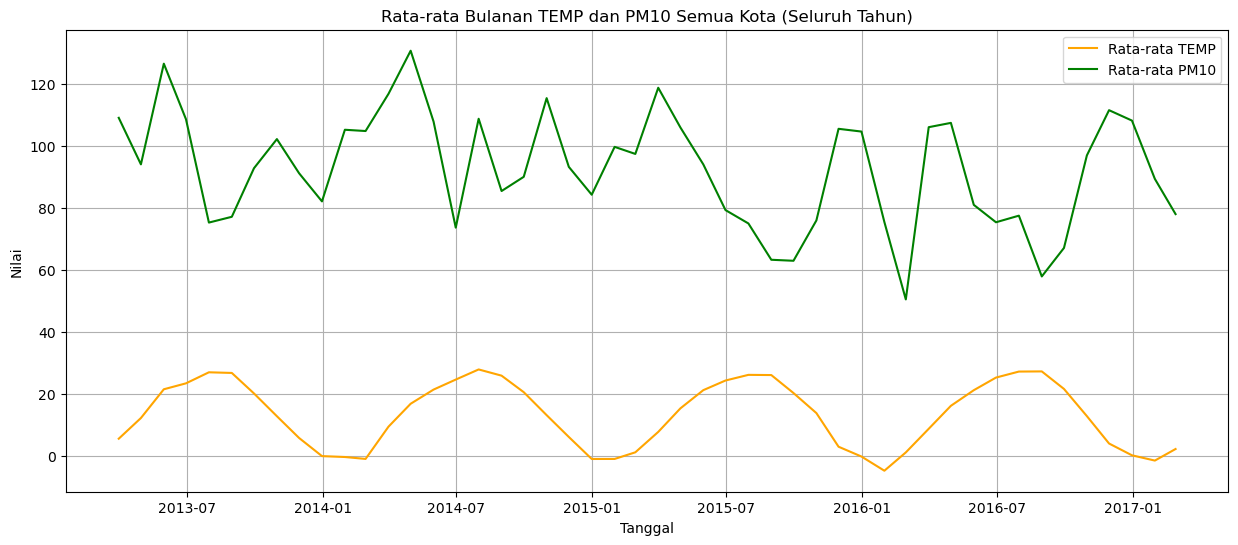

In [152]:
date_data = {}
temp_time_series = {}
pm10_time_series = {}

# Loop untuk menyimpan data TEMP dan PM10 tanpa filter tahun
for df_name, df in data_city.items():
    df['date'] = pd.to_datetime(df['date'])  # Pastikan kolom 'date' dalam format datetime
    date_data[df_name] = df['date']
    
    # Resample TEMP bulanan
    temp_resampled = df[['date', 'TEMP']].set_index('date').resample('ME').mean()
    temp_time_series[df_name] = temp_resampled
    
    # Resample PM10 bulanan
    pm10_resampled = df[['date', 'PM10']].set_index('date').resample('ME').mean()
    pm10_time_series[df_name] = pm10_resampled

# Gabungkan semua TEMP dan PM10 berdasarkan tanggal
temp_combined = pd.concat(temp_time_series.values(), axis=1)
temp_combined.columns = list(temp_time_series.keys())
avg_temp = temp_combined.mean(axis=1)

pm10_combined = pd.concat(pm10_time_series.values(), axis=1)
pm10_combined.columns = list(pm10_time_series.keys())
avg_pm10 = pm10_combined.mean(axis=1)

# Plot TEMP dan PM10 dalam satu grafik
plt.figure(figsize=(15, 6))
plt.plot(avg_temp.index, avg_temp, label='Rata-rata TEMP', color='orange')
plt.plot(avg_pm10.index, avg_pm10, label='Rata-rata PM10', color='green')
plt.title('Rata-rata Bulanan TEMP dan PM10 Semua Kota (Seluruh Tahun)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()


#### mencari tahu pada tanggal berapa nilai PM10 tertinggi pada setiap kota

In [133]:
max_pm10_dates = {}

for df_name, df in data_city.items():
    # Cari nilai maksimum PM10
    max_pm10_value = df['PM10'].max()
    # Cari tanggal yang sesuai
    max_date = df.loc[df['PM10'] == max_pm10_value, 'date'].iloc[0]

    max_pm10_dates[df_name] = {'Date': max_date, 'Max PM10': max_pm10_value}

# Membuat DataFrame dari hasil pencarian
max_pm10_df = pd.DataFrame.from_dict(max_pm10_dates, orient='index')

# Menampilkan hasil
max_pm10_df


,Date,Max PM10
Aotizhongxin,2013-06-30 22:00:00,317.0
Changping,2013-03-08 10:00:00,257.0
Dingling,2013-03-27 02:00:00,235.0
Dongsi,2013-05-06 00:00:00,301.0
Guanyuan,2013-05-06 03:00:00,295.0
Gucheng,2013-10-28 22:00:00,336.0
Huairou,2013-05-06 07:00:00,268.0
Nongzhanguan,2013-05-24 02:00:00,293.0
Shunyi,2013-10-04 18:00:00,284.0
Tiantan,2013-12-07 02:00:00,279.0


#### mencari rata-rata tanggal saat PM10 tinggi pada setiap kota

In [135]:
# Konversi kolom 'Date' menjadi datetime
max_pm10_df['Date'] = pd.to_datetime(max_pm10_df['Date'])

# Menghitung rata-rata tanggal
average_date = max_pm10_df['Date'].mean()
average_PM10 = max_pm10_df['Max PM10'].mean()

# Menampilkan hasil
print("Tanggal rata-rata dari nilai PM10 tertinggi:", average_date)
print("Dengan Nilai rata-rata PM10 sebesar:", average_PM10)


Tanggal rata-rata dari nilai PM10 tertinggi: 2013-06-13 08:45:00
Dengan Nilai rata-rata PM10 sebesar: 289.5


#### mencari tahu korelasi dari salah satu kota di china

In [136]:
korelasi = data_city["Aotizhongxin"][['PM10', 'TEMP']].corr()
korelasi

,PM10,TEMP
PM10,1.000000,-0.056249
TEMP,-0.056249,1.000000


**Insight:**
- untuk mempermuda EDA, ambil rata-rata pada nilai PM10 pada setiap bulannya. hasilnya adalah setiap kota memiliki bentuk grafik yang hampir sama pada nilai PM10
- untuk mempermuda EDA, ambil rata-rata pada nilai TEMP pada setiap bulannya. hasilnya adalah setiap kota memiliki bentuk grafik yang bisa dikatakan sama pada nilai TEMP
- hasil rata-rata tiap bulan semua kota untuk nilai pada PM10 dan TEMP menunjukkan bahwa hubungan nilai suhu dengan nilai PM10 tidak sama
- Setiap kota memiliki PM10 tinggi pada tanggal yang hampir berdekatan
- Rata-rata tanggal pada setiap kota saat PM10 terdapat pada tanggal 2015-08-10 18:00:00
- setiap kota memiliki nilai korelasi yang hampir mirip satu dengan lainnya
- pada kota Aotizhongxin, PM10 memiliki korelasi tinggi ke PM2.5, CO, NO2

## Visualization & Explanatory Analysis

### Pertanyaan 1:
#### bagaimana perubahan nilai PM10 dari tahun 2015 hingga 2017?

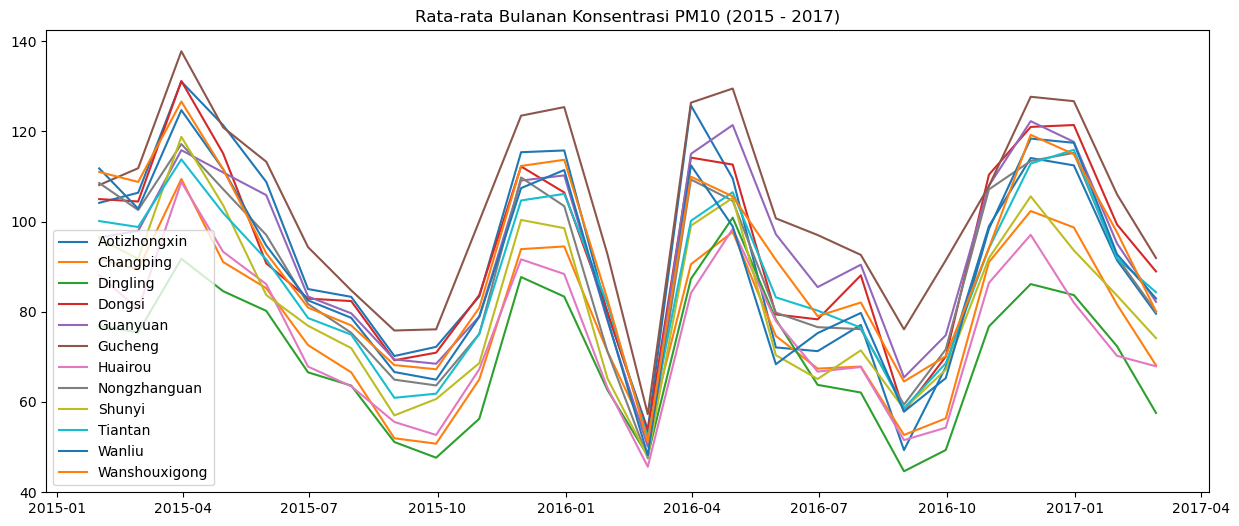

In [144]:
date_data = {}
data_time_series = {}

for df_name, df in data_city.items():
    date_data[df_name] = df['date']
    # Ubah menjadi indeks waktu dan resample bulanan
    data_time_series[df_name] = df[['date', 'PM10']].set_index('date').resample('ME').mean()
    # Filter data hanya dari 2015 sampai 2017
    data_time_series[df_name] = data_time_series[df_name].loc['2015':'2017']

plt.figure(figsize=(15, 6))
for df_name, df in data_time_series.items():
    plt.plot(df.index, df['PM10'], label=df_name)

plt.title('Rata-rata Bulanan Konsentrasi PM10 (2015 - 2017)')
plt.legend()
plt.show()


### Pertanyaan 2:
#### pada tanggal berapa nilai PM10 tertinggi di China? 

#### membuat data frame baru yang berisi semua data pengecekan udara di China

In [137]:
# Menggabungkan semua data dari dictionary menjadi satu DataFrame
all_data = pd.concat(data_city.values(), ignore_index=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402030 entries, 0 to 402029
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   PM10     402030 non-null  float64       
 1   TEMP     402030 non-null  float64       
 2   station  402030 non-null  object        
 3   date     402030 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.3+ MB


#### mengecek data hasil gabungan

In [138]:
all_data.head(10)

,PM10,TEMP,station,date
0,4.0,-0.7,Aotizhongxin,2013-03-01 00:00:00
1,8.0,-1.1,Aotizhongxin,2013-03-01 01:00:00
2,7.0,-1.1,Aotizhongxin,2013-03-01 02:00:00
3,6.0,-1.4,Aotizhongxin,2013-03-01 03:00:00
4,3.0,-2.0,Aotizhongxin,2013-03-01 04:00:00
5,5.0,-2.2,Aotizhongxin,2013-03-01 05:00:00
6,3.0,-2.6,Aotizhongxin,2013-03-01 06:00:00
7,6.0,-1.6,Aotizhongxin,2013-03-01 07:00:00
8,6.0,0.1,Aotizhongxin,2013-03-01 08:00:00
9,8.0,1.2,Aotizhongxin,2013-03-01 09:00:00


#### mendapatkan nilai rata-rata PM10 hasil dari gabungan

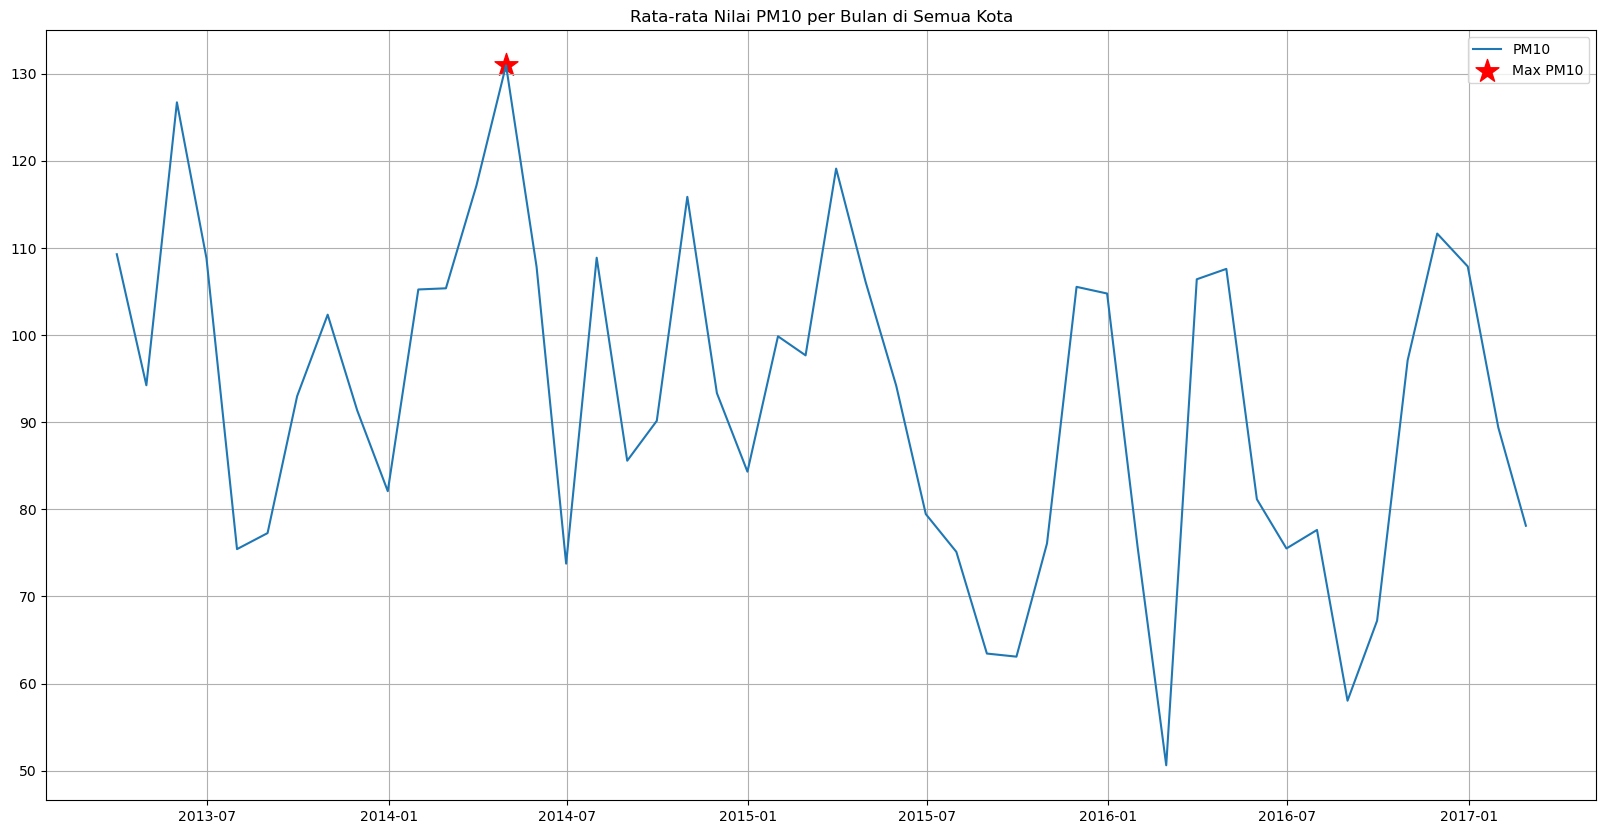

Tanggal PM10 tertinggi: 2014-04-30, dengan nilai PM10: 130.97


In [139]:
# Menghitung rata-rata PM10 untuk semua kota per bulan
data_time_series = all_data[['date', 'PM10']].set_index('date').resample('ME').mean()

# Mencari nilai maksimum PM10 dan tanggalnya
max_pm10_value = data_time_series['PM10'].max()
max_pm10_date = data_time_series['PM10'].idxmax()

# Membuat visualisasi
plt.figure(figsize=(20, 10))
plt.plot(data_time_series.index, data_time_series['PM10'], linestyle='-', label='PM10')

# Menandai titik maksimum dengan warna merah
plt.scatter(max_pm10_date, max_pm10_value, color='red', s=300, marker='*', label=f'Max PM10')

# Menambahkan judul dan label
plt.title('Rata-rata Nilai PM10 per Bulan di Semua Kota')
plt.legend()
plt.grid()

# Menampilkan grafik
plt.show()

# Menampilkan tanggal saat PM10 tertinggi
print(f"Tanggal PM10 tertinggi: {max_pm10_date.date()}, dengan nilai PM10: {max_pm10_value:.2f}")


### Pertanyaan 3:
#### Bagaimana hubungan antara tingkat PM10 dengan temperature?

#### membuat matriks korelasi untuk semua variable numerik

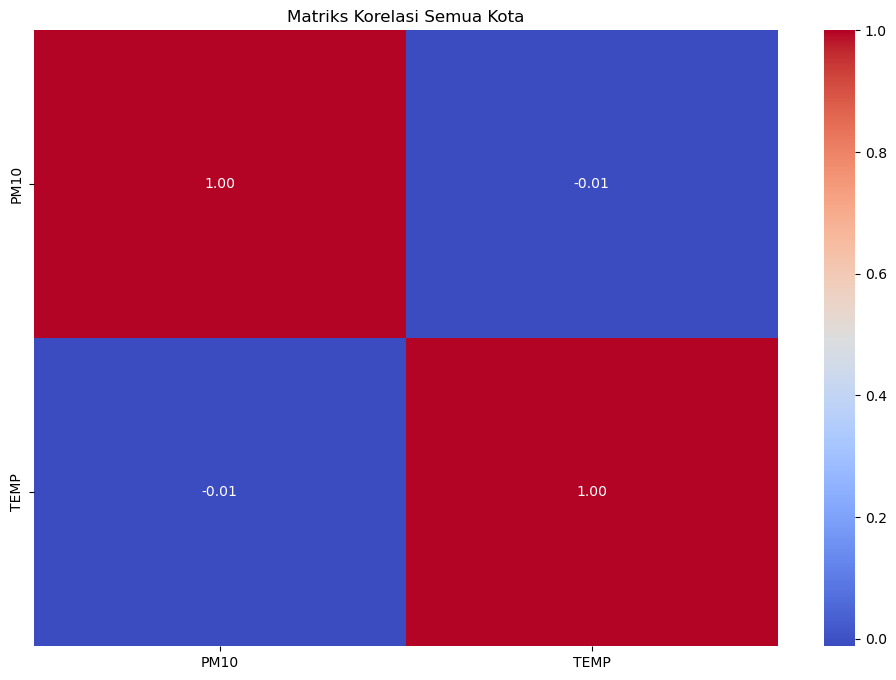

In [140]:
# Memilih hanya kolom numerik
numeric_data = all_data.select_dtypes(include=['number'])

# Menghitung korelasi antar kolom numerik
correlation_matrix = numeric_data.corr()

# Menampilkan hasil
plt.figure(figsize=(12, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Semua Kota")
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\asus-\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

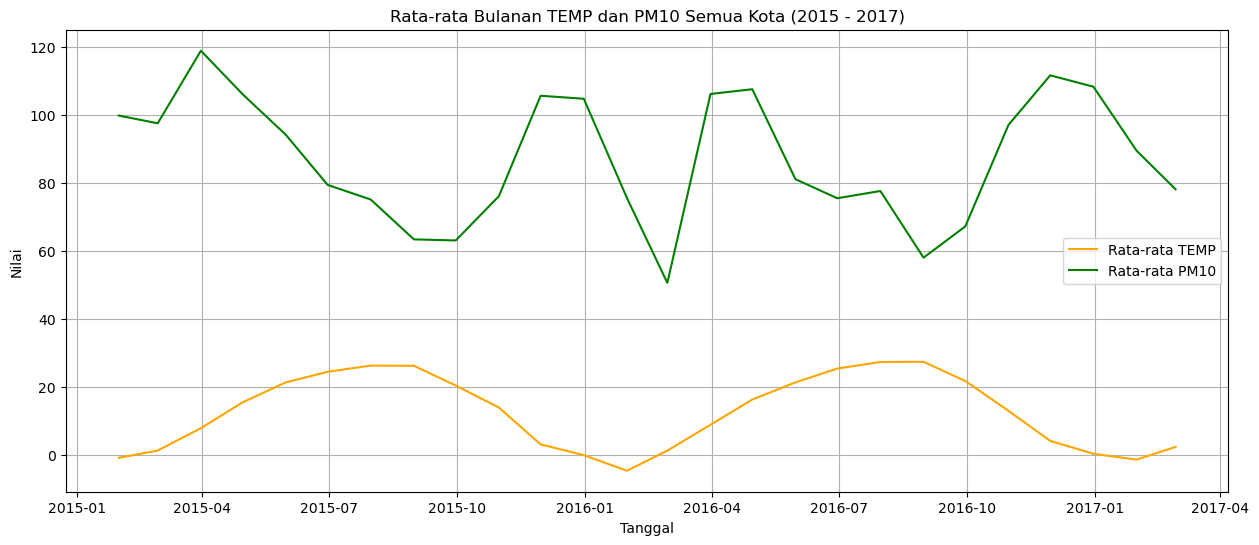

In [151]:
date_data = {}
temp_time_series = {}
pm10_time_series = {}

# Loop untuk menyimpan data TEMP dan PM10 dari tahun 2015–2017
for df_name, df in data_city.items():
    df['date'] = pd.to_datetime(df['date'])  # Pastikan kolom 'date' dalam format datetime
    date_data[df_name] = df['date']
    
    # Resample TEMP
    temp_resampled = df[['date', 'TEMP']].set_index('date').resample('ME').mean()
    temp_time_series[df_name] = temp_resampled.loc['2015':'2017']
    
    # Resample PM10
    pm10_resampled = df[['date', 'PM10']].set_index('date').resample('ME').mean()
    pm10_time_series[df_name] = pm10_resampled.loc['2015':'2017']

# Gabungkan semua TEMP dan PM10 berdasarkan tanggal
temp_combined = pd.concat(temp_time_series.values(), axis=1)
temp_combined.columns = list(temp_time_series.keys())
avg_temp = temp_combined.mean(axis=1)

pm10_combined = pd.concat(pm10_time_series.values(), axis=1)
pm10_combined.columns = list(pm10_time_series.keys())
avg_pm10 = pm10_combined.mean(axis=1)

# Plot TEMP dan PM10 dalam satu chart
plt.figure(figsize=(15, 6))
plt.plot(avg_temp.index, avg_temp, label='Rata-rata TEMP', color='orange')
plt.plot(avg_pm10.index, avg_pm10, label='Rata-rata PM10', color='green')
plt.title('Rata-rata Bulanan TEMP dan PM10 Semua Kota (2015 - 2017)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt


### Pertanyaan 4

#### Bagaimana persebaran stasiun pengecekan data yang ada di China?

#### membuat program pengeccekan geografi untuk tempat stasiun pengecekan udara

In [141]:
# Inisialisasi geocoder
geolocator = Nominatim(user_agent="geoapi")

# Fungsi untuk mendapatkan koordinat
def get_coordinates(station_name):
    try:
        location = geolocator.geocode(station_name + ", China")  # Menambahkan "China" agar lebih spesifik
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# Menghapus duplikasi stasiun agar tidak mengulang pencarian yang sama
unique_stations = all_data[['station']].drop_duplicates()

# Mendapatkan koordinat untuk setiap stasiun (dengan jeda agar tidak diblokir)
unique_stations[['latitude', 'longitude']] = unique_stations['station'].apply(get_coordinates)

# Menggabungkan kembali dengan all_data
all_data = all_data.merge(unique_stations, on="station", how="left", suffixes=('', '_duplicate'))

# Menampilkan hasil
print(all_data[['station', 'latitude', 'longitude']].head())

        station   latitude   longitude
0  Aotizhongxin  34.374734  109.016205
1  Aotizhongxin  34.374734  109.016205
2  Aotizhongxin  34.374734  109.016205
3  Aotizhongxin  34.374734  109.016205
4  Aotizhongxin  34.374734  109.016205


#### membuat program untuk menampilkan peta persebaran stasiun pengecekan udara di China

In [142]:
def plot_china_map(data):
    # Path ke file gambar lokal
    image_path = 'E:/2. UKSW/2. Akademik/Semester 11/2. DBS Foundation/3. Materi/1. Machine Learning/8. Belajar Analisis Data dengan Python/submission/'
    image_path = image_path + 'china.jpg'

    # Membaca gambar peta China dari file lokal
    china_map = mpimg.imread(image_path)

    # Membuat scatter plot berdasarkan data geografis
    ax = data.plot(kind="scatter", x="longitude", y="latitude", 
                   figsize=(10,10), alpha=0.3, s=5, c='red')

    # Menyembunyikan sumbu koordinat
    plt.axis('off')

    # Menampilkan gambar peta dengan batas koordinat China
    plt.imshow(china_map, extent=[73, 135, 18, 53])  # Disesuaikan dengan batas geografis China

    # Menampilkan plot
    plt.show()

#### menampilkan peta persebaran data dan ekstraks data hasil analisis

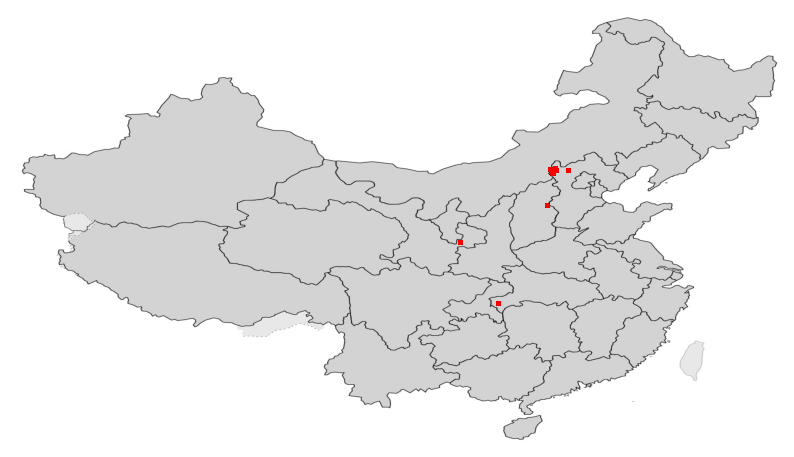

In [143]:

# Membersihkan data (hapus baris dengan NaN)
all_data = all_data.dropna(subset=['longitude', 'latitude'])

# Menampilkan peta
plot_china_map(all_data)

# export data
# all_data.to_csv('data_kualitas_air.csv', index=False)

**Insight:**
- rata-rata nilai PM10 pada tahun 2015 hingga 2017 pada semua kota di negara China sangatlah dinamis
- dari rata-rata nilai PM10 pada semua kota, nilai tertinggi PM10 berada pada bulan april tahun 2014 dengan nilai PM10 sebesar 130.97
- PM10 memiliki korelasi yang rendah dengan TEMP dengan nilai korelasi -0.01 sehingga menunjukkan suhu tidak berpengaruh pada peningkatan atau penurunan nilai PM10
- persebaran stasiun pengecekan tidak begitu merata dan hanya berada di bagian tengah negara cina

## Analisis Lanjutan (Opsional)

diperlukan pengecekan lebih lanjut terhadap data yang memiliki nilai PM10 yang sangat tinggi. 
informasi yang diberikan oleh data sudah sesuai karena sudah melakukan perbaikan data sebelumnya

## Conclusion

- pada tahun 2015 hingga 2017, nilai ratai-rata PM10 pada setiap kota memiliki perubahan yang fluktuatif setiap bulannya
- jika diambil rata-rata pada semua kota maka nilai PM10 tertinggi berada di tanggal 30 April 2014 dengan nilai PM10 mencapai 130.97
- hubungan nilai TEMP dengan PM10 sangat rendah, nilainya hanya -0.01
- nilai PM10 tidak mempengaruhi nilai TEMP
- persebaran pengecekan data tidak begitu merata dan hanya berada di tengah negara Cina Daratan saja

In [153]:
all_data.to_csv(data_dir + 'dashboard.csv', index=False)